# Supervised Learning Introduction

**Definition:** A form of machine learning where the model learns from labeled data ${(xi, yi)}$ to predict an output y given an input x.

**Goal:**  Estimate a function $f : R^D \rightarrow R$, such that $y = f(x) + \epsilon$, where $\epsilon$ always is noise.

## Learning Model

The **Learning Model** consists of:  
* **Hypothesis Set:** Defines the hypothesis space $H = \{h(x,\theta) \mid \theta \in \Theta\}$, where:
    - $h(x,\theta)$ represents candidate functions
    - $\theta$ are the learnable parameters
    - $\Theta$ is the parameter space

* **Learning Algorithm:**
    - Using training set $D$ and a cost function we find function $h(x) \in H \approx \text{target  function}$   
    or
    - Find $\theta^* \in \Theta$ such that $h(x,\theta^*) \approx f(x)$.

* **Evaluation**:  
    - measure how well estimated function generalizes to unseen examples.

**Unknown target function:** $f: x \rightarrow y$ where $x$ is input space and $y$ is output space  
**Training data:** ${(x_1, y_1)}$, ${(x_2, y_2)}$, ..., ${(x_N, y_N)}$  
from hypothesis set $H$ **pick a formula** $g: x \rightarrow y$ that approximates the target function $f$
<div style="text-align:center">
  <img src="images/SLComponents.png" alt="Supervised learning components">
</div>

## Regression vs Classification  

* ***Regression:*** predict a *continuous* target variable
* ***Classification:*** predict a *discrete* target variable

# Linear Regression

## Introduction

- **Linear Regression Hypothesis**: $$\hat y(x) =  h_w(x) = w_0 + w_1x_1 + ... + w_D x_D = w^Tx = w_0 + \sum_{i=1}^{D} w_i x_i$$   
    Where:  
    - **Input Vector:** $$x = [x_0=1, x_1, x_2, ..., x_D]$$
    - **Parameter Vector:** $$w = [w_0, w_1, w_2, ..., w_D]$$  
- **Objective** is to minimize the difference between predicted values $\hat y(x)$ or $h_w(x)$ and actual values $y$.

## Cost Function

Difference between predicted and actual values is quantified using *cost functions*, which guide us in choosing the optimal hypothesis.  
A cost function measures how well the hypothesis $h(x,w)$ fits the training data.

In regression problems, the most common error function is the **Squared Error (SE)**:
$$SE = (y^{(i)} - h(x^{(i)},w))^2$$  

Cost function should measure all predictions. Thus a choice could be **Sum of Squared Errors (SSE)**:
$$J(w) = \sum_{i=1}^N(y^{(i)} - h(x^{(i)},w))^2$$
$$SSE = \sum_{i=1}^N(y^{(i)} - w^Tx^{(i)})^2$$

Penalizes larger errors more severely than smaller ones (due to the square).

**Objective:** *Minimize* the cost function to find the best parameters $w$.

Parameters of the best hypothesis for the training set:
$$w^∗ = argmin_wJ(w)$$

## Analytical Solution

### **Introduction**

**Objective:** *Minimize* the cost function to find the best parameters $w$.

**The learning algorithm:** optimization of the cost function  
Explicitly taking the cost function derivative with respect to the $w_i$’s, and setting them to zero.

Parameters of the best hypothesis for the training set:
$$w^∗ = argmin_wJ(w)$$

### **Limitations**

* **Scalability**: Not scale well with large dataset  
* **Computational**: Finding the inverse of a matrix required high computational power
* **Online Learning**: In online learning, model is updated incrementally. New data arrives in a *continuous stream*.
    - Analytical Solution requires full data batch upfront.
    - Cannot update model with new data without re-computing everything.

### **Univariate**

#### **Introduction**

**Univariate** problem refers to any problem with single variable(feature, one-dimensional data). *(D = 1)*
$$f(x;w) = w_0 + w_1x_1$$

#### **Minimize Cost Function**

- **Cost Function (SSE):**
$$J(w_0, w_1) = \sum_{i=1}^N(y^{(i)} - w_0 - w_1x^{(i)})^2$$

- **Partial Derivatives**
    - Gradient with respect to $w_0$
    $$\frac{\partial J(w)}{\partial w_0} = \sum_{i=1}^{n} 2 \left( y^{(i)} - w_0 - w_1 x^{(i)} \right) (-1) = 0$$
    $$w_0 = \frac{Y - w_1X}{n}$$
    - Gradient with respect to $w_1$
    $$\frac{\partial J(w)}{\partial w_1} = \sum_{i=1}^{n} 2 \left( y^{(i)} - w_0 - w_1 x^{(i)} \right) (-x^{(i)}) = 0$$
    $$w_1 = \frac{n\sum_{i=1}^{n}x^{(i)}y^{(i)} - XY}{n\sum_{i=1}^{n}{x^{(i)}}^2 - X^2}$$
    - Where:
        - $Y = \sum_{i=1}^{n} y^{(i)}$
        - $X = \sum_{i=1}^{n} x^{(i)}$
- **Result:** 
    -  A system of 2 linear equations and 2 unknown parameter

#### **Codes**

##### **Simple Regression Code**

In [1]:
x = [5, 3, -1, 2, 6]
y = [14, 6, -5.5, 3.5, 18]
print(f"x:{x}", f"y:{y}")

x:[5, 3, -1, 2, 6] y:[14, 6, -5.5, 3.5, 18]


In [13]:
X, Y, XiYi, Xi2 = 0, 0, 0, 0
n = len(x)
for i in range(n):
    X += x[i]
    Y += y[i]
    XiYi += x[i] * y[i]
    Xi2 += x[i] ** 2
print(f"n:{n}", f"X:{X}", f"Y:{X}", f"XiYi:{XiYi}", f"Xi2:{Xi2}")

n:5 X:15 Y:15 XiYi:208.5 Xi2:75


In [14]:
w1 = (n * XiYi - X * Y) / (n * Xi2 - X**2)
print(w1)

3.35


In [16]:
w0 = (Y - w1 * X) / n
print(w0)

-2.85


##### **More advance Regression Code**

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [ ]:
# Simulating Data
n = 1000
x = np.random.normal(3, 5, size=n)
# last section is some noise in normal distribution with 0 mean and 3 variance
y = -15 * x + 20 + np.random.normal(0, 3, size=n)

In [19]:
# Analytical approach for solving linear regression
X = np.sum(x)
Y = np.sum(y)
b1 = (n * np.dot(x,y) - Y*X)/(n*np.dot(x,x)-X**2)
b0 = (Y-b1*X)/n
b1, b0 = round(b1, 2), round(b0, 2)
print(f"y = {b1} x + {b0}")

y = -14.99 x + 19.93


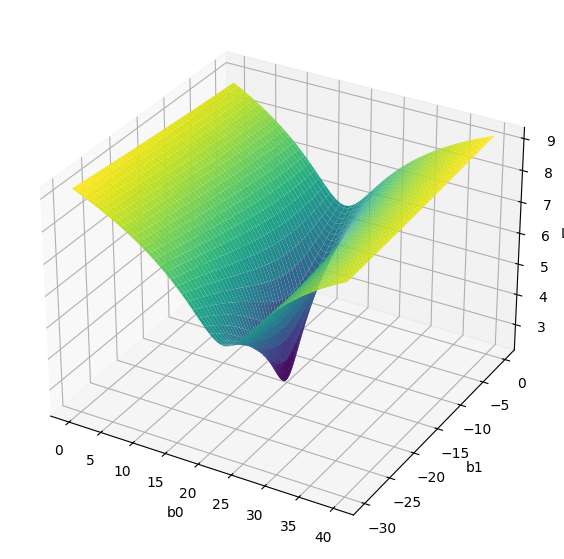

In [ ]:
# Mean Squared Error
def MSE_loss(b0, b1, x, y):
    pred = b0 + b1 * x
    loss = np.sum((pred - y) ** 2) / len(y)
    return loss

# Generate a grid of b0 and b1 values around the real b0=20 and b1=-15
b0_vals = np.linspace(0, 40, 100)
b1_vals = np.linspace(-30,0, 100)

# Calculate MSE loss for each point of this grid
# Log-scale is used only for better visualization
Z = np.zeros((len(b0_vals),len(b1_vals)))
for i in range(len(b0_vals)):
    for j in range(len(b1_vals)):
        Z[i, j] = np.log(MSE_loss(b0_vals[i], b1_vals[j], x, y))

# 3D Plot of MSE loss in log-scale
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
B0, B1 = np.meshgrid(b0_vals, b1_vals)
ax.plot_surface(B0, B1, Z, cmap='viridis')

# Adding labels
ax.set_xlabel('b0')
ax.set_ylabel('b1')
ax.set_zlabel('Loss')
plt.show()

### **Multivariate**

#### **Introduction**

**Multivariate** problem refers to any problem with multiple variable.

<div style="text-align:center">
  <img src="images/multivariate.png" alt="multivariate params">
</div>

Which $x_m^{(i)}$ indicates $m$'th feature of data point $i$.
Example:
$$y_1 = w_0x_{10} + w_1x_{11} + ... + w_Dx_{1D}$$
And we have as result:
$$\hat y = Xw$$

#### **Cost Function**

For $N$ training samples with $d$ features:
* Hypothesis (Prediction Model):
    $$h(x^{(i)}, w) = w_0 + w_1x_1^{(i)} + ... + w_dx_d^{(i)} = w^Tx^{(i)}$$
    *Where $x^{(i)}$ includes bias term $x_0 = 1$.*

* SSE Cost function:
$$SSE = J(w) = \sum_{i=1}^N(y^{(i)} - h(x^{(i)},w))^2 = \sum_{i=1}^N(y^{(i)} - w^Tx^{(i)})^2$$

* VEctorized Form:
    $$J(w) = (y - Xw)^T(y - Xw)$$

    Where:  
        - $y \in R^N$: Target vector  
        - $X \in R^{N(d+1)}$: Design matrix (each row is a sample $x^{(i)}$)  
        - $w \in R^{(d+1)}$: Weight vector ($w = [w_0 + w_1 + ... + w_d]^T$)
    
    The goal is to find:
        $$\hat w = \argmin_{w \in R^{(d+1)}} J(w)$$

#### **Minimizing Cost Function**

* Expand the SSE:
    - Multiply Rule
    $$(AB)^T = B^TA^T$$
    - So:
    $$SSE = J(w) = (y - Xw) ^ 2 = (y - Xw)^T(y - Xw) = y^Ty - y^TXw - w^TX^Ty + w^TX^TXw$$
    - Since $y^TXw$ is a scalar, then:
        $$y^TXw = (y^TXw)^T = w^TX^Ty$$
    - Thus the expression simplifies to:
    $$J(w) = y^Ty - y^TXw - w^TX^Ty + w^TX^TXw = y^Ty - 2y^TXw + w^TX^TXw = y^Ty - 2w^TX^Ty + w^TX^TXw$$
<br><br>
* Compute the Gradient:
    - Derivative Rules:
    $$\frac{\partial w^TA}{\partial w} = A$$
    $$\frac{\partial w^TAw}{\partial w} = 2Aw$$
    - Apply to $J(w)$:
    $$\frac{\partial J(w)}{\partial w} = -2X^Ty + 2X^TXw = 0$$
    - Set Gradient to Zero:
    $$-2X^Ty + 2X^TXw = 0 \rightarrow X^TXw = X^Ty$$

* Solve for $w$:  
    Multiply $X^TX^{(-1)}$ to both sides:
    $$(X^TX)^{(-1)}X^TXw = (X^TX)^{(-1)}X^Ty$$
    $$w = (X^TX)^{(-1)}X^Ty$$

* Key points:
    - $X^+ = (X^TX)^{(-1)}X^T$ is called *pseudo-inverse* of matrix $X$
    - The matrix $X$ is often not square (it is N*d+1 matrix) so it is not invertible.
    - The pseudo-inverse can be computed for any matrix, regardless of its shape.
    - If X was squared matrix then $X^+ = X^{(-1)}$

#### **Codes**

##### **Generate Synthetic Data**  

Line of $y = 3x + 8$ with noise of $\epsilon = 5$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def generate_data(n=50, noise=5.0):
    np.random.seed(42)
    X = np.linspace(-10, 10, n)
    # Ground truth line: y = 3x + 8
    true_slope = 3
    true_intercept = 8
    noise = np.random.randn(n) * noise
    y = true_slope * X + true_intercept + noise
    return X, y

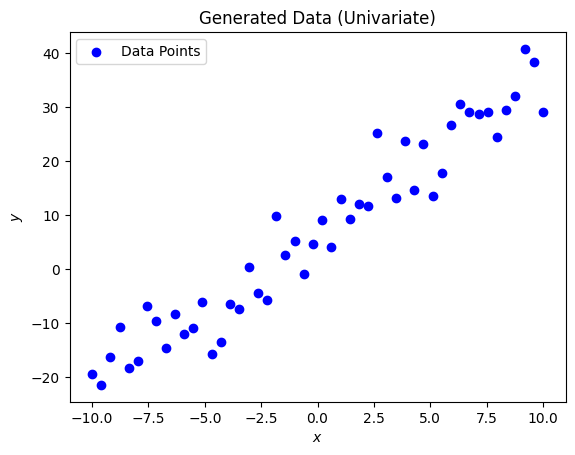

In [4]:
X, y = generate_data(n=50, noise=5.0)
plt.scatter(X, y, color='blue', label='Data Points')
plt.title("Generated Data (Univariate)")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

##### **Implement the Closed-Form Solution**

In [5]:
# Hypothesis: h_w(x) = w_0 + w_1 * x_1
def h_w(x, w):
    return w[0] + w[1] * x  # equivalent to w_0 + w_1 * x

# Linear Regression using closed-form solution
def linear_regression_closed_form(X, y):
    # Adding bias term (x_0 = 1) to input vector X
    X_b = np.c_[np.ones((len(X), 1)), X]  # X_b is now the full input vector with bias term
    # Closed-form solution: w = (X^T * X)^-1 * X^T * y
    w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return w

# Get parameter vector w
w = linear_regression_closed_form(X, y)
print(f"Parameters (w): ")
print(f"w_1 = {w[1]:.2f}, w_0 = {w[0]:.2f}")

Parameters (w): 
w_1 = 2.86, w_0 = 6.87


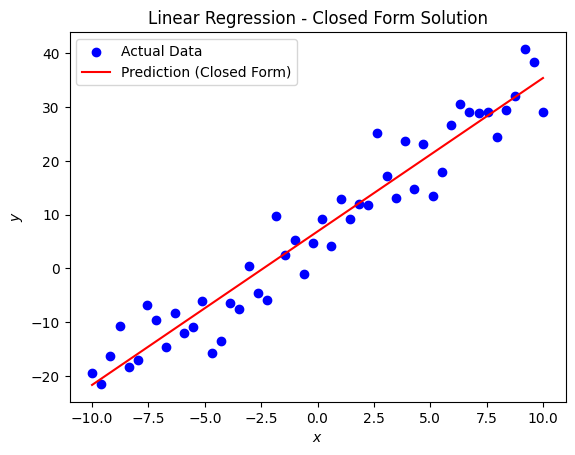

In [6]:
y_pred = h_w(X, w)

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Prediction (Closed Form)')
plt.title("Linear Regression - Closed Form Solution")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

## Iterative Optimization

### **Iterative optimization of cost function**

* Cost Function: $J(w)$
* Problem: $\hat w = \argmin_w J(w)$

* Solution:
    - start from random $w^0$
    - Repeat:
        - Update $w^t$ to $w^{(t+1)}$ in order to reduce $J(w)$
        - t = t + 1
    - Until end up at a minimum *(hopefully)*

    where $t$ is iteration counter.

### **Gradient Descent**

#### **Introduction**

Also known as *steepest descent*.

In each step, takes steps proportional to the negate of teh gradient descent vector of the current point.
$$w^{(t+1)} = w^t - \gamma_t \nabla_w J(w^t)$$
Where:
- $w^t$ is the current point.
- $\gamma_t$ is step size *(learning rate parameter)*.
- $J(w)$ decreases from $w^t$ in the direction of $-\gamma_t \nabla_w J(w^t)$.
- **Assumption**: $J(w)$ is defined and differentiable in a neighborhood of a point $w^t$.

**Minimize $J(w)$**
$$w^{(t+1)} = w^t - \gamma_t \nabla_w J(w^t)$$
$$\nabla_w J(w^t) = [\frac{\partial{J(w)}}{\partial{w_1}}, \frac{\partial{J(w)}}{\partial{w_2}}, ..., \frac{\partial{J(w)}}{\partial{w_d}}]$$

Key Marks:
* $\gamma$ is step size (learning rate).
* $\gamma$ can change at every iteration
* If $\gamma_t$ is small enough, then $J(w^{(t+1)}) \le J(w^{(t)})$
* When $\gamma$ is too small: gradient descent can be slow.
* When $\gamma$ is too large: gradient descent can overshoot the minimum. May fail to converge or diverge.

#### **Gradient Descent for SSE cost function**

**Objective**: Minimize Sum of Squared Errors (SSE)

* **SSE Loss Function:**
    $$SSE = J(w) = \sum_{i=1}^N(y^{(i)} - h(x^{(i)},w))^2 = \sum_{i=1}^N(y^{(i)} - w^Tx^{(i)})^2$$

* **Gradient of SSE:**
    $$\frac{\partial J(w)}{\partial w} = -2X^Ty + 2X^TXw = -2X^T(y - Xw)$$
    The gradient points in the direction of steepest ascent of $J(w)$

* **Gradient Descent Update Rule:**
    $$w^{(t+1)} = w^t - \gamma_t \nabla_w J(w^t)$$
    Expanded Form:
    $$w^{(t+1)} = w^t - \gamma_t \sum_{i=1}^N(y^{(i)} - w^Tx^{(i)})x^{(i)}$$

    As we said earlier:
    * When $\gamma$ is too small: gradient descent can be slow.
    * When $\gamma$ is too large: gradient descent can overshoot the minimum. May fail to converge or diverge.

#### **Gradient Descent Disadvantages**

**Local Minima Problem**

If $J(w)$ is convex, the all local minima are also global minima. So gradient descent can converge to the global minima.  
<div style="text-align:center">
  <img src="images/GradientDescentProblem.png" alt="Gradient Descent in non-convex function">
</div>

**We will fix this issue later.**

### **Stochastic Gradient Descent Variations**

#### **Gradient Descent Variations**

* **Batch Gradient Descent**:
    - Process the entire training set per iteration.
    - Updates the weights smoothly towards the optimal solution.
    - Computationally intensive for large datasets.
    - Infeasible for some applications. *(BGD needs entire training set which is not available in some cases like online learning)*

* **Mini-batch Gradient Descent**:
    - Process small, random subset of data per iteration.
    - Balance between efficiency and computational power.
    - Best option. Not computationally intensive or noisy.

* **Stochastic Gradient Descent**:
    - Process one training example per iteration. Which is good for real-time applications and online learning. 
    - Updates model parameters more frequently, which can lead to faster convergence.
    - Introduce nose, causing more steps during the descent.
    - The path to convergence is more erratic (not smooth movement anymore).

#### **Linear regression with SSE cost function**

* **Loss Function**:
$$J(w) = \sum_{i=1}^n j^{(i)}(w)$$
$$j^{(i)}(w) = (y^{(i)} - w^Tx^{(i)})^2$$
* **Gradient Per Sample**:
$$\nabla_w J^{(i)}(w) = (y^{(i)} - w^Tx^{(i)})x^{(i)}$$
* **SGD Update Rule**:
$$w^{(t+1)} = w^t - \gamma \nabla_w J^{(i)}(w)$$
* **Least Mean Square**:
$$w^{(t+1)} = w^t - \gamma (y^{(i)} - w^Tx^{(i)})x^{(i)}$$

*where $i$ indicates the $i$'th sample.*

## Polynomial Regression

### **Recall: Linear Regression**

**Linear Regression Functions**:
- Univariate:
    $$f: R \rightarrow R f(x;w) = w_0 + w_1x_1$$
- Multivariate:
    $$f: R^d \rightarrow R f(x;w) = w_0 + w_1x_1 + ... w_dx_d$$
    Where $w = [w_0, w_1, ..., w_d]^T$ are the parameters need to set.

**Square Loss Cost Function:**
$$SSE = J(w) = \sum_{i=1}^N(y^{(i)} - f(x^{(i)},w))^2 = y - Xw$$
After minimizing the squared loss, we obtain:
$$\hat w = (X^TX)^{(-1)}X^Ty$$
Where $(X^TX)^{(-1)}X^T$ called *pseudo inverse*.

### **Introduction**

**Reduction:**
Problem *reduction* is the process of converting Problem A into Problem B such that:
* An instance of A is transformed into an instance of B.
* A solution to B can be mapped back to a solution for A.

This is useful when:
* Problem B has a known efficient solution, and you want to reuse it for A.
* Proving hardness (e.g., showing that A is at least as hard as B).

The goal is to reduce polynomial regression problem to linear regression.

How to extend the linear regression to non-linear functions:
- Transform the data using *basis functions* 
- Learn a linear regression on the new feature vectors (obtained by *basis functions*)

<div style="text-align:center">
  <img src="images/PolyRegressionEg1.png" alt="change of basis example">
</div>

### **Polynomial Regression (Beyond Linear Regression)**

Based on Polynomial basis function, we have:

* $m$'th order univariate polynomial regression:
    $$f(x;w) = w_0 + w_1x + w_2x^2 + ... + w_{m-1}x^{m-1} + w_{m}x^{m}$$

* Similar to univariate we can define:
    <div style="text-align:center">
    <img src="images/polyRegressionParams.png" alt="polynomial regression params">
    </div>

    Which $x^{(i)}$ indicates the $i$'th sample.


* Square Loss Cost Function:
$$SSE = J(w) = y - X'w$$
* Closed form solution:
$$\hat w = (X'^TX')^{(-1)}X'^Ty$$

Examples:
<div style="text-align:center">
  <img src="images/polyRegEg2.png" alt="polynomial regression with different m's">
</div>

### **Basis Functions**

these are some examples of famous basis functions:

#### **Linear**

Given:
- $m = d$
- $\phi(x) = x_i$
- $i = 1, ..., d$

Model Form:
$$f(x;w) = w_0 + w_1x_1 + ... + w_dx_d$$

#### **Polynomial (Univariate)**

Given:
- $\phi_i(x) = x^i$
- $i = 1, ..., m$

Model form:
$$f(x;w) = w_0 + w_1x + ... + w_{m-1}x^{m-1} + w_mx^m$$

**Assumptions**:
- Feature vector grows rapidly with higher degree $m$.
- The matrix $\phi^T\phi$ may become non-invertible. Because its determinant approaches zero, making inversion impossible.
-  Odd-powered terms introduce asymmetric behavior. (One side of the plot rises while the other falls.)
<div style="text-align:center">
  <img src="images/BasisFuncPolynomial.png" alt="polynomial basis function">
</div>

#### **Gaussian**

Estimate a target function using a linear combination of Gaussian basis functions with their corresponding weights:
$$\phi_j(x) = e^{-\frac{(x-c_j)^2}{2\sigma_j^2}}$$
$$f(x;w) = w_0 + w_1N(\mu_1, \sigma_1^2) + ... + w_mN(\mu_m, \sigma_m^2)$$

**Assumption**:
- Measuring the similarity to the prototypes $c_1, c_2, ..., c_m$
- $\sigma_i^2$ controls how quickly it vanishes as a function of the distance to the prototype.

<div style="text-align:center">
  <img src="images/BasisFuncGaussian.png" alt="gaussian basis function">
</div>

#### **Sigmoid**

$$\phi_j(x) = \sigma({\frac{||x-c_j||}{2\sigma_j}})$$
Where:
$$\sigma(\alpha) = \frac{1}{1+\exp(-\alpha)}$$

<div style="text-align:center">
  <img src="images/BasisFuncSigmoid.png" alt="sigmoid basis function">
</div>

### **Generalized Linear**

$$J(w) = \sum_{i=1}^N(y^{(i)} - f(x^{(i)},w))^2 = \sum_{i=1}^N(y^{(i)} - w^T\phi(x^{(i)}))^2$$
Where $\phi$ is a basis function and:
<div style="text-align:center">
  <img src="images/generalizedLinear.png" alt="generalized linear optimization">
</div>

We obtain:
$$\hat w = (\phi^T\phi)^{(-1)}\phi^Ty$$

### **Over-fitting**

If you have any problem with training and test error concepts read *generalization* section.  

The goal is to build a model that performs effectively on unseen data.


**Over-fitting Problem** occurred, when both of these conditions met:
- $\text{Training Loss} \approx 0$ (model fits training data perfectly)
- $\text{Expected (Test) Loss} \gg 0$ (model fails on new data)

##### **Over-fitting causes**:

- **Model Complexity:** Model with large number of parameters (degree of polynomial is too large) *compared to the data size*
- **Low Number of Training Data:** Small data size *compared to the complexity of the model*

<div style="text-align:center">
  <img src="images/PolyModelComplexity.png" alt="polynomial model complexity">
</div>

*Over-fitting problem becomes less severe as the training data size increases.*:
<div style="text-align:center">
  <img src="images/overfittingWithLargeDataSize.png" alt="over-fitting problem as the training data grows">
</div>

## Generalization

### **Training & Test Performance**

**Assumption:** *Training* & *test* examples $(x, y)$ are *independently* and *random* from *same*, *unknown* distribution $p(x, y)$.  
$$(x, y) \sim p(x, y)$$

* **Empirical (training) loss:**
    - Sum of squared error on training data.
    $$J(w) = \frac{1}{n}\sum_{i=1}^n Loss(y^{(i)}, f(x^{(i)};w))$$

* **Expected (test) loss:**
    - Expected performance on unseen data.
    - We want accurate predictions on unseen data.
    $$J(w) = E_{x,y}[Loss(y, f(x;w))] = \int \int p(x,y)({y-f(x;w)})^2{d}x{d}y$$
    - We cannot compute test loss directly because the distribution of all samples $p(x,y)$ is unknown.
    - Solution: A held-out test set (never used during training).

### **Training Data Size**

* By increasing the size of training data, error decreases and solution is better up to certain point.
* At certain point, eventually, stops improving even with more data.
* Reasons:
    - Real-world data is noisy.
    - Model mis-specification.
<div style="text-align:center">
  <img src="images/trainDataSize.png" alt="train data size effect plot">
</div>

### **Structural & Approximation Error**

* **Structural Error:** The error introduced by the limited function class (infinite training data).
    $$w^* = \argmin_w E_{x,y}[(y - w^Tx)^2] = \int \int p(x,y)(y - w^Tx)^2{d}x{d}y$$
    $$\text{Structural Error:} E_{x,y}[(y - w^{*^T}x)^2]$$
    Where:
    - $w^* = (w_0^*, w_1^*, w_d^*)$ are the optimal parameters over all distribution.
    - Theoretical; because the distribution $p(x,y)$ is unknown.

* **Approximation Error:** The difference between optimal linear predictions with limited training data and linear predictions using all distribution.
    $$\hat w = \argmin_w \sum_{i=1}^n (y^{(i)} - w^Tx^{(i)})^2$$
    $$\text{Approximation Error:} E_{x}[(w^{*^T}x - \hat w^{T}x)^2]$$
    Where:
    - $\hat w$ are the parameter estimates based on a small training set (using $n$ random samples).

### **Error Decomposition**

We can decompose the expected error of a learned model into two components:

> **Expected Error = Structural Error + Approximation Error**

$$E_{x,y}\left[(y - \hat{w}^T x)^2\right] = E_{x,y}\left[(y - w^{*T}x)^2\right] + E_{x}\left[(w^{*T}x - \hat{w}^T x)^2\right]$$

Where:
- **Structural Error**: Unavoidable error due to noise in $y$, even with the true model $w^*$
    $$E_{x,y}[(y - w^{*T}x)^2]$$

- **Approximation Error**: Arises because $\hat w$ differs from $w^*$
    $$E_{x}[(w^{*T}x - \hat{w}^T x)^2]$$
- $w^*$ is the optimal weight vector minimizing the expected loss (true minimizer).
- $\hat{w}$ is the weight vector found by your learning algorithm (approximation).

#### **Proof**

**Derivation**

* **Expected squared error of the learned model:**
    $$
    E_{x,y}\left[(y - \hat{w}^T x)^2\right]
    $$
    Add and subtract $w^{*T}x$ inside the square:
    $$
    = E_{x,y}\left[\left(y - w^{*T}x + w^{*T}x - \hat{w}^T x\right)^2\right]
    $$
    Apply the expansion of the square:
    $$
    = E_{x,y}\left[(y - w^{*T}x)^2\right] + E_{x,y}\left[(w^{*T}x - \hat{w}^T x)^2\right] + 2E_{x,y}\left[(y - w^{*T}x)(w^{*T}x - \hat{w}^T x)\right]
    $$

* **Simplify the cross-term:**
    $$
    E_{x,y}\left[(y - w^{*T}x)(w^{*T}x - \hat{w}^T x)\right] = E_{x,y}\left[(y - w^{*T}x)((w^* - \hat{w})^T x)\right]
    $$
    Since $A^TB = B^TA$, we can rewrite it as:
    $$
    = E_{x,y}\left[(y - w^{*T}x)x^T(w^* - \hat{w})\right]
    $$

* **Use Optimality of $w^*$**
    Recall:
    $$
    w^* = \argmin_w E_{x,y}[(y - w^T x)^2]
    $$
    From the condition of optimality:
    $$
    \frac{\partial}{\partial w} E_{x,y}[(y - w^T x)^2] = -2E_{x,y}[x(y - w^T x)] = 0 \quad \text{at } w = w^*
    $$
    Thus:
    $$
    E_{x,y}[(y - w^{*T}x)x^T] = 0
    $$
    Therefore, the cross-term vanishes:
    $$
    E_{x,y}\left[(y - w^{*T}x)x^T(w^* - \hat{w})\right] = 0
    $$

* **Final Decomposition**
    $$
    E_{x,y}[(y - \hat{w}^T x)^2] = E_{x,y}[(y - w^{*T}x)^2] + E_{x}[(w^{*T}x - \hat{w}^T x)^2]
    $$
    **Expected Error = Structural Error + Approximation Error**

### **Bias Variance Trade-off**

#### **Best Unrestricted Regression Function**

##### **Core Concepts: Data Distribution & Modeling**

* **Feature Distribution ($p(x)$):** Describes how training features are sampled from distribution.

* **Target Distribution ($p(y|x)$):** For a fixed $x$, the target $y$ is sampled from a conditional distribution, composed of:
    - A true target function ($h(x)$)
    - Noise
    
    E.g: For Gaussian noise: $p(y|x) = N(h(x), \sigma^2)$

Training examples ($x^{(i)}, y^{(i)}$) are drawn from a joint distribution $p(x,y)$:
$$p(x, y) = p(x)p(y|x)$$

<div style="text-align:center">
  <img src="images/LearningDiagramNoisyTarget.png" alt="learning diagram including noisy target">
</div>

##### **Best Unrestricted Regression Function ($h^*(x)$)**

**Assumption:**
- We know the joint probability distribution $p(x, y)$ and no constraints on the regression function.
- Cost Function: Mean Squared Error

$$h^*(x) = \argmin_{h:R^d \rightarrow R} E_{x, y}\left[\left(y-h(x)\right)^2\right] = E_{y|x}[y]$$

For each fixed $x$ takes an average of $p(y|x)$ as $h^*(x)$

**proof:**

The goal is to find function $h(x)$ that minimizes the expected error:
$$E_{x, y}\left[\left(y-h(x)\right)^2\right] = \int \int (y - h(x))^2p(x,y) dx dy$$

Fix $x$ and Minimize Over $h(x)$
$$\frac{\partial}{\partial h(x)}  E_{x,y}\left[\left(y-h(x)\right)^2\right] = \frac{\partial}{\partial h(x)} \int (y - h(x))^2p(x,y) dy = 0$$

Take the Derivative:
$$ = \int 2(y-h(x))p(x,y) dy = 0$$
$$= \int yp(x,y) dy - \int h(x)p(x,y) dy = 0$$
$$\int yp(x,y) dy = h(x)\int p(x,y) dy$$

Solve for $h(x)$:
$$h(x) = \frac{\int yp(x,y) dy}{\int p(x,y) dy} = \frac{\int yp(x,y) dy}{p(x)}$$

Since $\frac{p(x,y)}{p(x)} = p(y|x)$:
$$h(x) = \int yp(y|x)dy = E_{y|x}[y]$$

**Conclusion:**
$$h^*(x) = E_{y|x}[y]$$

#### **Bias-Variance Decomposition**

##### **True Error Expectation: Learning vs. Noise**

The goal is to analyze **true expected error** of a learned function $f_D(x)$ compared to the actual target value $y$:
$$E_{true}[f_D(x)] = E_{x,y}\left[\left(f_D(x) - y \right)^2\right]$$

Add and subtract the true function $h(x)$:
$$ = E_{x,y}\left[\left(f_D(x) - h(x) + h(x) - y \right)^2\right]$$
$$ = E_{x}\left[\left(f_D(x) - h(x)\right)^2\right] + E_{x,y}\left[\left(h(x) - y\right)^2\right] + 2E_{x,y}[(f_D(x) - h(x))((h(x) - y))]$$

Show the cross-term vanishes:
$$E_{x,y}[(f_D(x) - h(x))((h(x) - y))] = \int \int (f_D(x) - h(x))((h(x) - y))p(x,y) dy dx$$
$$ = \int (f_D(x) - h(x)) \int ((h(x) - y))p(x,y) dy dx$$

Simplify the inner integral using:
- $\int p(x,y) dy = p(x)$
- $p(x,y) = p(x)p(y|x)$
- $h(x) = \int yp(y|x)dy$

$$\int ((h(x) - y))p(x,y) dy = h(x)\int p(x,y) dy - \int yp(x,y) dy$$
$$ = h(x)p(x) - \int yp(x)p(y|x) dy$$
$$ = p(x)h(x) - p(x)\int yp(y|x) dy = 0$$

Final result:
$$E_{true}[f_D(x)] = E_{x,y}[(f_D(x) - y)^2]
= \underbrace{E_x\left[(f_D(x) - h(x))^2\right]}_{\text{Learning Error}}
+ \underbrace{E_{x,y}\left[(h(x) - y)^2\right]}_{\text{Noise/Error in Data}}$$

**Key Results:**
- The first term *Learning Error* measures **how well the model approximates the true function**.
- The second Term *Noise* shows the **irreducible** minimum value of the loss function

##### **True Error Expectation: Bias & Variance**

Recall **True Expected Error** of a learned function $f_D(x)$
$$E_{true}[f_D(x)] = E_{x,y}\left[\left(f_D(x) - y \right)^2\right] = E_x\left[\left(f_D(x) - h(x)\right)^2\right] + \text{Noise}$$

We are interested in the **average error over different datasets** $D$:
$$E_D\left[E_x\left[\left(f_D(x) - h(x)\right)^2\right]\right] = E_x\left[E_D\left[\left(f_D(x) - h(x)\right)^2\right]\right]$$

We now want to focus on:
$$E_D\left[\left(f_D(x) - h(x)\right)^2\right]$$

Define average hypothesis:
$$\bar f(x) = E_D[f_D(x)] = \frac{1}{K} \sum_{k-1}^K f_{D^{(k)}}(x)$$
Where:
- $K$ is the number of training sets (each of size $N$), sampled from $p(x, y)$
- $D^{(1)}, D^{(2)}, ..., D^{(K)}$ are different datasets

Add and subtract $\bar{f}(x)$ inside the square:
$$E_D\left[\left(f_D(x) - h(x)\right)^2\right] = E_D\left[\left(f_D(x) - \bar f(x) + \bar f(x) - h(x)\right)^2\right]$$
$$ = E_D\left[\left(f_D(x) - \bar f(x)\right)^2\right]  + (\bar f(x) - h(x))^2 + 2E_D\left[(f_D(x) - \bar f(x))(\bar f(x) - h(x))\right]$$

Since:
$$E_D\left[f_D(x) - \bar f(x)\right] = 0$$
The cross-term vanishes, and we have:
$$E_D\left[\left(f_D(x) - h(x)\right)^2\right] = \underbrace{E_D\left[\left(f_D(x) - \bar f(x)\right)^2\right]}_{\text{var}(x)}  + \underbrace{(\bar f(x) - h(x))^2}_{\text{bias}(x)}$$

**Final Result:**
$$E_x\left[E_D\left[\left(f_D(x) - h(x)\right)^2\right]\right] = E_x[\text{var}(x) + \text{bias}(x)] = \text{var + bias}$$

**Key Results:**
* **variance:**
    - **Definition:** Measures how much the model's predictions sensitivity when trained on different datasets.
    - **Implications:**
        - High variance: The model overfits to the training data, capturing noise instead of the true pattern (poor generalization).
        - Low Variance: The model is stable across datasets (better generalization).
    - **Formula:**
        $$\text{Variance = }E_D\left[\left(f_D(x) - \bar f(x)\right)^2\right]$$
        Where $D$ is the training dataset, and $f_D$ is the model trained on $D$

* **Bias:**
    - **Definition:** Measures the systematic error due to overly simplistic assumptions in the model.  
        *(Difference of average of our estimates with best unrestricted regression function)*
    - **Implications:**
        - High Bias: The model underfits, failing to capture the true relationship (e.g., linear model for nonlinear data).
        - Low Bias: The model is flexible enough to approximate the true function.
    - **Formula:**
        $$\text{Bias = }(\bar f(x) - h(x))^2$$
        Where $h^*(x) = E_{y|x}[y]$ is the best unrestricted regression function.

* **Bias-Variance Tradeoff:**
    $$E_{true}[f_D(x)] = E_{x,y}\left[\left(f_D(x) - y \right)^2\right] = Bias + Variance + Noise$$
    - The goal is to balance both to minimize total error.
    - Increasing model complexity reduces bias but increases variance, and vice versa.

**Assumptions:**
- 2 training example ($N=2$)
- Two models used for learning:
  - $H_0: f(x) = b$
  - $H_1: f(x) = ax + b$
  - $H_0$ is better model than $H_1$
- **Lesson:** Mach model complexity to the data source not to the complexity of target function.

<div style="text-align:center">
  <img src="images/biasVarianceEg.png" alt="Bias vs. Variance">
</div>

##### **Expected Error & Number of Data Points**

**Simple models**:
- Often underfit (such as linear regression)
- Bias remains large even with infinite data.
- Low variance.
- Lead to Large approximation and generalization error.

**Complex Model:**
- Tend to overfit.
- Variance dominates the model is too complex.
- Low bias.
- Lead to large generalization error.

<div style="text-align:center">
  <img src="images/ExpectedErrorAndDataSize.png" alt="Expected and train error with data size">
</div>

## Evaluation & Model Selection

## Regularization

### **Introduction**

**Definition:** Adding a penalty term in the cost function to discourage the coefficients from reaching large values.

**Purpose:** Prevent overfitting bt penalizing large weights.

$$J(w) = \sum_{i=1}^n(y^{(i)} - w^T\phi(x^{(i)}))^2 + \lambda w^Tw$$

The goal is to minimize cost function. So:
$$\frac{\partial}{\partial w} (y - \phi w)^2 + \lambda w^Tw = 0$$
Since:
$$w^Tw = w_1^2 + w_2^2 + ... + w_d^2$$
As a result we have:
$$2\phi^T \phi w - 2\phi^Ty + 2 \lambda w = 0$$
$$\hat w = (\phi^T \phi + \lambda I)^{-1}\lambda^Ty$$

Where:
- $\lambda w^Tw$ is regularization term.
- $\lambda$ controls the balance between fit and simplicity.
- Regularization does not effect on $w_0$ because $w_0$ is fixing the target range and there is no reason for minimizing $w_0$.

* **Large $\lambda$:**
    - Smaller weights
    - Reduces complexity
    - Increases bias
    - Decreases variance

* **Small $\lambda$:**
    - Allows larger weights
    - Increases complexity
    - Reduces bias
    - Increases variance
    - Better chance of approximation without generalization

<div style="text-align:center">
  <img src="images/regularizationParam.png" alt="regularization parameter">
</div>

### **Regularization & Complexity of Hypothesis Space**

* **Less Complex Hypothesis ($H$):**
    - $J_{\text{train}}(\hat w) \approx J_v(\hat w)$
    - $J_{\text{train}}(\hat w)$ is very high.
    - Better chance of generalization

* **More Complex Hypothesis ($H$):**
    - $J_{\text{train}}(\hat w) \ll J_v(\hat w)$
    - $J_{\text{train}}(\hat w)$ is low. but $J_v(\hat w)$ is high.
    - Better chance of approximation

<div style="text-align:center">
  <img src="images/errorWithPolyDegree.png" alt="Complexity of Polynomial Hypothesis Space">
</div>

**Compare:**
- **More complex $H$ (left one)**
- **Less complex $H$ (right one)**
<div style="text-align:center">
  <img src="images/hypothesisComplexity.png" alt="Complexity of General Hypothesis Space">
</div>

**Balance Fit & Complexity:**
* **Large $\lambda$** means prefer to more simple models.
* **Small $\lambda$** means prefer to more complex models.
<div style="text-align:center">
  <img src="images/compareLambda.png" alt="Compare large, intermediate and small lambda">
</div>

### **Regularization & Bias-Variance**

* **Large $\lambda$:**
    - Increases bias
    - Decreases variance

* **Small $\lambda$:**
    - Reduces bias
    - Increases variance

<div style="text-align:center">
  <img src="images/regularizationAndBiasVariance.png" alt="Regularization & Bias-Variance">
</div>

## Probabilistic Regression

### **Introduction**

Previously, we modeled the relationship between data points using a single deterministic function.  
Now, we shift to a **probabilistic perspective**, where:
- instead of predicting a specific output, for each input $x$, model the entire distribution of possible outputs $y$ given $x$ ($p(y|x)$).
- Describing uncertainty over value of target variable as a probability distribution.

**Visualization:**
- The **blue curve** in the figure represents the true distribution of $y$ across $x_0$.
- The **red curve** shows the modeled mean $f(x;w)$, with noise around it.

<div style="text-align:center">
  <img src="images/probaPerspective.png" alt="probability perspective curve fitting">
</div>

### **Maximum Likelihood Estimation (MLE)**

**Probabilistic Modeling of Regression**

Assume $y$ given $x$ follows a  Gaussian (Normal) distribution:
$$p(y|x) = N(f(x;w), \sigma^2)$$
This is equivalent to writing:
$$y = f(x;w) + \epsilon, \quad \epsilon \sim N(0, \sigma^2)$$

That means:
- For a fixed $x$, $y$ is normally distributed
- Mean = $f(x; w)$
- Variance = $\sigma^2$

We model the uncertainty in the predictions:
$$p(y|x,w,\sigma^2) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2\sigma^2}(y - f(x;w))^2}$$

**Apply MLE**

Recall: The likelihood of parameters $w$ and $\sigma^2$
$$L(D;w,\sigma^2) = \prod_{i=1}^n p(y^{(i)} | x^{(i)}, w, \sigma^2)$$

The goal is to find:
$$\hat w = \argmax_{w}L(D;w,\sigma^2)$$

It is easier to maximize the log-likelihood instead:
$$\hat w = \argmax_{w} \ln L(D;w,\sigma^2)$$

$$\ln L(D;w,\sigma^2) = \ln \prod_{i=1}^n p(y^{(i)} | x^{(i)}, w, \sigma^2) = \sum_{i=1}^n \ln p(y^{(i)} | x^{(i)}, w, \sigma^2)$$

Substitute the Gaussian formula:
$$\ln p(y^{(i)} | x^{(i)}, w, \sigma^2) = -\ln \sigma - \frac{1}{2}\ln 2\pi - \frac{1}{2\sigma^2} (y^{(i)} - f(x^{(i)};w))^2$$

Then the full log-likelihood becomes:
$$\ln L(D;w,\sigma^2) = -n \ln \sigma - \frac{n}{2}\ln 2\pi - \frac{1}{2\sigma^2}\sum_{i=1}^n (y^{(i)} - f(x^{(i)};w))^2$$

**MLE for $w$**

The Goal is:
$$\hat w = \argmax_{w} \ln L(D;w,\sigma^2) = -n \ln \sigma - \frac{n}{2}\ln 2\pi - \frac{1}{2\sigma^2}\sum_{i=1}^n (y^{(i)} - f(x^{(i)};w))^2$$

Which is the same as:
$$\hat w = \argmin_{w} \frac{1}{2\sigma^2}\sum_{i=1}^n (y^{(i)} - f(x^{(i)};w))^2$$

This is exactly the minimizing **Sum of Squared Errors (SSE)**.  
The standard objective in linear regression.

**MLE for $\sigma^2$**

To estimate the variance, differentiate the log-likelihood with respect to $\sigma^2$ and set it to 0:
$$\frac{\partial}{\partial \sigma^2} \ln L(D;w,\sigma^2) = 0$$
$$\frac{\partial}{\partial \sigma^2} (-\frac{n}{2} \ln \sigma^2 - \frac{n}{2}\ln 2\pi - \frac{1}{2\sigma^2}\sum_{i=1}^n (y^{(i)} - f(x^{(i)};w))^2) = 0$$
$$\frac{\partial}{\partial \sigma^2} \ln L(D;w,\sigma^2) = -\frac{n}{2}.\frac{1}{\sigma^2} + \frac{1}{\sigma^4}\sum_{i=1}^n (y^{(i)} - f(x^{(i)};w))^2 = 0$$
Solve for $\hat \sigma^2$:
$$\hat \sigma^2 = \frac{1}{n}\sum_{i=1}^n (y^{(i)} - f(x^{(i)};w))^2$$

This is the **average squared residual**.  
The standard unbiased estimator for noise variance in Gaussian models.

### **Maximum a Posterior (MAP)**

**Probabilistic Modeling of Regression**

* Given observations $D$
* We assign a Gaussian prior to the weights:
    $$p(w) = N(0, \sigma^2)$$
    This means:
    - The weights are assumed to be normally distributed around zero (mean = 0)
    - The variance ($\sigma^2$) controls how strongly we expect the weights to stay near zero.

**Recall: Maximum a Posterior:**
$$\theta_{MAP} = \max_{\theta}p(\theta | D)$$
Since $p(\theta | D) \propto p(D | theta)p(\theta)$:
$$\theta_{MAP} = \max_{\theta} p(D | theta)p(\theta)$$

$$\max_{w}p(w|X,y,\sigma^2) \propto p(y|X,w,\sigma^2)p(w) = \max_w \ln p(y|X,w,\sigma^2)$$
Which:
$$p(w) = N(0, \alpha^2I) = (\frac{1}{\sigma\sqrt{2\pi}})^{d+1} e^{-\frac{1}{2\alpha^2}(w^Tw)}$$

$$\max_w \left[\ln p(y|X,w,\sigma^2) = \max_w (\ln p(w|D)) + (\ln p(w))\right] = \max_w \left[-\frac{1}{2\sigma^2}\sum_{i=1}^N(y^{(i)} - w^Tx^{(i)})^2 + -\frac{1}{2\alpha^2} w^Tw\right]$$
$$ = \min_w \left[\frac{1}{\sigma^2}\sum_{i=1}^N(y^{(i)} - w^Tx^{(i)})^2 + \frac{1}{\alpha^2} w^Tw\right]$$

**Equivalent to regularized SSE with $\lambda = \frac{\sigma^2}{\alpha^2}$**

# Classification

## Introduction

**Given:** Training Set
- A dataset $D$ with $N$ labeled instances $D = \{x^{(i)}, y^{(i)}\}_{i=1}^N$
- $y^{(i)} \in {1, 2, ..., K}$

**Goal:** Given an input $x$, assign it to one of $K$ classes.

**Examples:**
- Email Spam Detection
- Medical Diagnosis
- Handwritten digit recognition

**Decision Boundary:**

**Definition:** A dividing hyperplane that separates different classes in a feature space, also known as **Decision Surface**.

In a $d$-dimensional feature space, the decision boundary for a linear classifier is a hyper plane of dimension $d-1$.

<div style="text-align:center">
  <img src="images/decisionBoundary.png" alt="Decision Boundary Examples">
</div>

**Regression vs Classification:**

**Linear Regression:**
- Target: Continuous values (real numbers)

**Linear Classifier:**
- Target: Binary or multi-category labels

## Discriminant Functions

### **Introduction**

**Definition:** A discriminant function $f_i(x)$ that assigns a score to an input vector $x$, for each class $C_i(i=1, ..., K)$

**How it works:**
* **Binary Classification:**
    - Two functions $f_1(x)$ and $f_2(x)$ for classes $C_1$ and $C_2$. The class is predicted by comparing these two functions:
    $$
    \hat{y} = 
    \begin{cases} 
    C_1 & \text{if } f_1(x) \gt f_2(x) \\
    C_2 & \text{otherwise}
    \end{cases}
    $$
    - Decision boundary: $f(x) = 0$
    - For binary classification we can only find a function $f: R^d \rightarrow R$ where:
        - $f_1(x) = f(x)$
        - $f_2(x) = -f(x)$
<br><br>
* **General Case:**
    - For $k$-class problems, we compute $f_i(x)$ for every class $i$, and assign $x$ to class with highest score:
    $$\hat{y} = \argmax_i f_i(x)$$

### **Linear Classifier**

#### **Introduction**

##### **Core Concepts (definitions, limitations, decision surface)**

**Definition:** Decision boundaries are linear in $x$, or linear in some given set of functions of $x$ ($\phi(x)$).

**Linearly separable data:** data points that can be exactly classified by a linear decision surface.

**Why Linear Classifier:** *(even they are not optimal)*
- Simplicity
- Easy to compute
- Efficiency
- Attractive candidates for initial, trial classifiers
- Effectiveness

**Two Category Classification**
$$f(x;w) = w^Tx + w_0 = w_0 + w_1x_1 + ... + w_dx_d$$
Where:
- $x = [x_1, x_2, ..., x_d]$
- $w = [w_1, w_2, ..., w_d]$
- $w_0$: Bias

$$
\hat{y} = 
\begin{cases} 
C_1 & \text{if } w^Tx + w_0 \ge 0 \\
C_2 & \text{otherwise}
\end{cases}
$$

**Decision Boundary(Surface):** 
$$w^Tx + w_0 = 0$$
Decision Boundary is a $(d−1)$-dimensional hyperplane in $d$-dimensional space.

##### **$w$ is orthogonal to every vector lying within the decision surface**

Decision Surface:
$$w^Tx + w_0 = 0$$
For any two points $x_1$ and $x_2$ on the decision surface:
$$w^Tx_1 + w_0 = 0 \quad \text{and} \quad w^Tx_2 + w_0 = 0$$
Subtracting these equations:
$$w^T(x_1 - x_2)  = 0$$
Which:
$x_1 - x_2$: A vector parallel to the decision surface.

**Conclusion:**
- $w$ is *orthogonal* to every vector lying within the decision surface
- $w$ acts as the *normal vector* to the decision surface

##### **Signed measure of the perpendicular distance $r$ of the point $x$ from the decision surface:**

- Decision surface $H$ is determined by the normal vector $w = [w_1, w_2, ..., w_d]$: $H = w^Tx + w_0$
- $w_0$ determine the location of the surface
- The normal distance from the origin to the decision surface is $\frac{w_0}{||w||}$

$$x = x_\perp + r\frac{w}{||w||}$$
Where, $r$ is the scalar distance (signed).

Evaluate $H$ at $x$:
$$w^Tx + w_0 = w^T(x_\perp + r\frac{w}{||w||}) + w_0$$
$$ = (w^Tx_\perp + w_0) + r\frac{w^Tw}{||w||}$$

Since $x_\perp \in H$ then $w^Tx_\perp + w_0 = 0$. So:
$$ = r\frac{||w||^2}{||w||} = r||w||$$

As a result:
$$w^Tx + w_0 = r||w||$$

Solve for r:
$$r = \frac{w^Tx + w_0}{||w||}$$

<div style="text-align:center">
  <img src="images/LinearClassifierDistance.png" alt="Linear Classifier Distance">
</div>

Linear boundary geometry POV summary:
<div style="text-align:center">
  <img src="images/LinearClassifierSummary.png" alt="Linear boundary geometry POV summary">
</div>

##### **Non-Linear Decision Boundary**

- **Feature Transformation ($\phi(x)$):** Non-linearity is introduced by transforming features into a higher dimensional space.

- **Linear in Transformed Space:** The decision boundary becomes linear in the new space, but non-linear in the original space.

Same as what we did in *Polynomial Regression* problem.

- Example:
<div style="text-align:center">
  <img src="images/non-linearDecisionBoundary.png" alt="Non-Linear Decision Boundary Example">
</div>

$$x_1^2 + x_2^2 = 1$$
$$\phi(x) = [1, x_1, x_2, x_1^2, x_2^2, x_1x_2]$$
$$w = [w_0, w_1, ..., w_6] = [-1, 0, 0, 1, 1, 0]$$
$$
y = 
\begin{cases} 
1 & \text{if } w^T\phi(x) \ge 0 \\
-1 & \text{otherwise}
\end{cases}
$$

#### **Cost function**

##### **Introduction**

Finding linear classifier can be formulated as *optimization problem*:

**Given:**
- Training set $D = \{x^{(i)},y^{(i)}\}$
- Cost function $J(w)$

**Find:**
- Optimal $\hat{f}(x) = f(x;\hat{w})$ where:
$$\hat{w} = \argmin_w J(w)$$

Unlike Regression problem, we will investigate several cost functions for Classification problem.

##### **Sum of Squared Error (SSE)**

**Formula:**
$$J(w) = \sum_{i=1}^n(w^Tx^{(i)} - y^{(i)})^2$$

**Limitations:**
- If the model predicts close to the true class but not exactly 0 or 1, SSE still shows positive error, even for correct predicts
- SSE penalizes too correct predictions (ones which lie a long way on the correct side of the decision)
- Lack of robustness to noise. Small variations can cause significant changes in the cost

<div style="text-align:center">
  <img src="images/SSECostFuncForClassification.png" alt="SSE cost function example">
</div>

##### **Alternative for SSE**

**Signed Activation Function**

make my notes better and prettier
**Definition:** Measures how many samples are misclassified by the model, penalizing each error by 4 units

**Formula:**
$$J(w) = \sum_{i=1}^n(\text{sign}(w^Tx^{(i)}) - y^{(i)})^2$$

Sign Function:
$$
\text{sign}(z) = 
\begin{cases} 
1 & z \lt 0 \\
-1 & z \ge 0
\end{cases}
$$

| **True Label (y)** | **Prediction** | **Calculation**               | **Cost (J)**|  
|--------------------|----------------|-------------------------------|-------------|  
|     $+1$           |     $+1$       |   $(+1 - (+1))^2 = 0$         | 0           |  
|     $-1$           |     $-1$       |   $(-1 - (-1))^2 = 0$         | 0           |  
|     $-1$           |     $+1$       |   $(-1 - (+1))^2 = 4$         | 4           |  
|     $+1$           |     $-1$       |   $(+1 - (-1))^2 = 4$         | 4           |  


**Limitations:**
- **Non-Differentiable:**
    - The $\text{sign}(z)$ function has discontinuities at $z=0$, making gradient-based optimization impossible.
- **Flat Gradients:**
    - The cost landscape has large flat regions.
- **Coarse Error Sensitivity:**
    - All misclassifications are penalized equally (4 units), regardless of how *close* the prediction was to the boundary.

**Sigmoid Activation Function**

- **Far from decision boundary**: Output approaches **1** (high confidence).
- **Close to decision boundary**: Output ≈ **0.5** (uncertain classification).
- Solves the **non-differentiable** problem of the sign function by providing smooth gradients.

**Formula:**
$$
\sigma(z) = \frac{1}{1 + e^{-z}} \quad \text{(Output range: 0 to 1)}
$$

**Limitations:**
- **Non-Convex Cost Function:**
    - May converge to local minima during optimization.

##### **Perceptron**

- **Core concept:**  
The perceptron criterion focuses on misclassified points.

- **Formula:**
    $$J_p(w) = -\sum_{i \in M}y^{(i)}w^Tx^{(i)}$$
    Where:
    - $y^{(i)} \in \{-1,+1\}$
    - $M$: Subset of training data what are misclassified
    - $w^T x^{(i)}$: Signed distance from decision boundary

- **Decompose $y^{(i)}w^Tx^{(i)}$ term:**
    - $y^{(i)}$ Set the sign (direction) of the perceptron.
    - $w^T x^{(i)}$: Signed distance from the decision boundary. It causes points farther from the boundary to be penalized more.

- **Classification Cases:**
    - **Correct Prediction:**
        - *Ignored in the sum (since $i \notin M$)*
    - **Incorrect Prediction** ($\text{sign}(w^T x^{(i)}) \neq y^{(i)}$)
        - $ y^{(i)} w^T x^{(i)} < 0 $ → **Positive penalty** in $ J_p(w) $  
        - Penalty scales with distance from boundary (farther = worse)

#### **Perceptron**

##### **Introduction**

**Perceptron Unit:**
- **Basic Building Block:**
  - A perceptron is the simplest type of artificial neuron used in machine learning.
- **Linear Classifier:**
  - It maps input features to an output by applying a linear combination and a threshold.
- **Binary Decision:**
  - Outputs 1 if the weighted sum of inputs exceeds the threshold.
- **Components:**
  - Inputs, weights, bias & an activation function (step or sigmoid function)

<div style="text-align:center">
  <img src="images/perceptronUnit.png" alt="Perceptron Unit">
</div>

**Inspired By Neurons:** Perceptron mimics the basic function of biological neurons in the brain

<div style="text-align:center">
  <img src="images/biologicalNeuron.png" alt="Biological Motivation Behind Perceptron">
</div>

**Single Neuron as a Linear Decision Boundary**

The output of a single neuron is:
$$y = f(w^Tx+w_0)$$
Where:
- $x$: Input vector
- $w$: weight vector
- $w_0$: Bias term
- $f$: Activation function (e.g: step, sigmoid)

**Linear Separation:** A neuron defines a linear decision boundary:
$$w^Tx+w_0 = threshold \text{ (0 for step, 0.5 for sigmoid)}$$

**Decision Rule:**
$$
y = 
\begin{cases} 
C_1 & \text{if } w^Tx+w \ge threshold \\
C_2 & \text{otherwise}
\end{cases}
$$

**Limitations of a Single Perceptron**
- **Performs Linear Separation:**
    - A single perceptron can handle linearly separable problems such as:
        - AND operation
        - OR operation

- **Fails on Non-Linear Problems:**
    - A single perceptron fails to solve non-linear problems like XOR
    - Non-Linear problem: Data points cannot be separated by a straight line.
    - Handle by using *Multi-Layer Perceptron* (MLP)

<div style="text-align:center">
  <img src="images/XORProblem.png" alt="XOR Problem">
</div>

**Multi-Layer Perceptron**

- **Adding Layers for More Complexity:**
    - MLP consists of multiple layers of neurons that allow us to model more complex functions
    - Each layer has new decision boundaries, making possible to separate non-linear data

- **Two-Layer Example**
    - Input Layer $\rightarrow$ Hidden Layer $\rightarrow$ Output Layer
    - Hidden layers introduce non-linear transformations through activation functions, enabling the network to model complex decision boundaries.

<div style="text-align:center">
  <img src="images/MLP.png" alt="2-Layer Perceptron">
</div>    

##### **Perceptron Algorithm**

- Binary Classification:
    $$y \in \{-1, 1\}$$
- Goal:
    $$\forall_i, x^{(i)} \in C_1 \rightarrow w^Tx^{(i)} \gt 0$$
    $$\forall_i, x^{(i)} \in C_2 \rightarrow w^Tx^{(i)} \lt 0$$
- Activation function:
    $$f(x;w) = \text{sign}(w^Tx)$$

**Perceptron criterion**
$$J_p(w) = - \sum_{i \in M} w^Tx^{(i)}y^{(i)}$$
Where:
- $M$: Subset of training data that are misclassified

*Which is discussed linear classifier cost function section.*

**Goal:** Minimize the loss by correctly classified all points.

##### **Batch Perceptron**

**Definition:** Updates the weight vector using all misclassified points in each iteration.

**Gradient Descent:** Adjusting weights in the direction that reduces the loss:
    $$w^t+1 = w^t - \eta \nabla_w J_p(w^t)$$
    $$\nabla_w J_p(w) = - \sum_{i \in M} x^{(i)}y^{(i)}$$

Batch Perceptron converges in finite number of steps for linearly separable data.

> Initialize $w$  
> Repeat:  
> &nbsp;&nbsp;&nbsp;&nbsp;$w = w + \eta \sum_{i \in M} x^{(i)}y^{(i)}$  
> Until:  
> &nbsp;&nbsp;&nbsp;&nbsp;$\eta \sum_{i \in M} x^{(i)}y^{(i)} < \theta$

##### **Single-Sample Perceptron**

**Definition:** Updates the weight vector after each individual point.

**Stochastic Gradient Descent (SGD):**
$$J_p(w) = \sum_{k=1}^KJ_p^{(k)}(w)$$
- Using only one misclassified sample at a time:
    $$w^t+1 = w^t + \eta x^{(i)}y^{(i)}$$
- Lower computational cost per iteration, maybe faster convergence.
- If we predicted wrong:
$$
w^{t+1} = 
\begin{cases} 
w^t + \eta x^{(i)} & \text{if } y^{(i)} \gt 0 \\
w^t - \eta x^{(i)} & \text{if } y^{(i)} \lt 0
\end{cases}
$$


If training data are linearly separable, the single-sample perceptron is also guaranteed to find a solution in a finite number of steps.

> Initialize $w$, $t \leftarrow 0$  
> Repeat:  
> &nbsp;&nbsp;&nbsp;&nbsp;$t \leftarrow t + 1$  
> &nbsp;&nbsp;&nbsp;&nbsp;$i \leftarrow t \bmod N$  
> &nbsp;&nbsp;&nbsp;&nbsp;if $x^{(i)}$ is misclassified then:  
> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$w = w + \eta x^{(i)} y^{(i)}$  
> Until all patterns are properly classified

##### **Pocket Algorithm**

**Limitations:**
- The Perceptron stops learning as soon as all training points are correctly classified, even if the decision boundary is suboptimal.
- When no linear decision boundary can perfectly separate the classes, the Perceptron fails to converge.

For the data that are not linearly separable due to noise:
Keeps in its pocket the best 𝒘 encountered up to now.

> Initialize w  
> for $t = 1, ..., T$  
> &nbsp;&nbsp;&nbsp;&nbsp;$i \leftarrow t \text{mod} N$  
> &nbsp;&nbsp;&nbsp;&nbsp;if $x^{(i)}$ is misclassified then  
> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$w^{new} = w + x^{(i)}y^{(i)}$  
> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;if $E_{train}(w^{new}) \lt E_{train}(w)$ then  
> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;w = w^{new}  
> end  

### **Linear Discriminant Algorithm (LDA)**

#### **Introduction**

Fisher's Linear Discriminant Analysis 

LDA, like the Perceptron algorithm, seeks a line (or hyperplane) to separate data, but its approach is different.

**How it works?**
- Predicts the class of an observation $x$ by first projecting it to the space of discriminant variables and then classifying it in this space
- Predicts the class of an observation $x$ by first **projecting it** to the space of new discriminant variables and then classifying it in this space

**Goal:**  After projection, the mapped data should be as separable as possible (unlike the Perceptron, which only focuses on correct classification).

**Dimensionality Reduction:** LDA can also reduce dimensions by creating a new feature (linear combination of original features) that best preserves class discrimination.

<div style="text-align:center">
  <img src="images/LDA.png" alt="LDA example">
</div>

**LDA Problem Definition**

**Problem:**
- $C = 2$ classes
- $\{(x^{i}, y^{(i)})\}_{i=1}^N$ training samples with $N_1$ samples from the first class ($C_1$)
and $N_2$ samples from the second class ($C_2$)

**Goal:**
- finding the best direction $w$ that we hope to enable accurate classification

**Tip:**
- The projection of sample $x$ onto a line in direction $w$ is $w^Tx$

#### **Measure of Separation in the Projected Direction**

##### **large separation between the projected class means**

**Goal:**
$$\hat{w} = \max_w J(w) = (\mu_1' - \mu_2')^2$$
$$\text{s.t.} ||w|| = 1$$

Where:
$$\mu_1 = \frac{\sum_x^{(i) \in C_1}}{N_1}, \quad \mu_1' = w^T\mu_1$$
$$\mu_2 = \frac{\sum_x^{(i) \in C_2}}{N_2}, \quad \mu_2' = w^T\mu_2$$

**Problem:** It does not consider the variances of the classes in the projected direction

##### **LDA Criteria**

**Fisher Idea:**
Find a projection direction $w$ that maximizes class separability by:
- **Maximizing the distance** between the projected means of the two classes *(between-class separation)*.
- **Minimizing the variance** (scatter) within each class after projection *(within-class compactness)*.

**Formula:**
$$J(w) = \frac{|\mu'_1 - \mu'_2|^2}{{s'_1}^2 + {s'_2}^2}$$

Where:
- $\mu'_1, \mu'_2$: Projected means of classes 1 and 2 onto direction w.
- ${s'_1}^2, {s'_2}^2$: Scatter (variance) of projected data within each class. *(Scatter matrices)*

Comparison between large separation between means *(left pic)* and LDA criteria *(right pic)*:
<div style="text-align:center">
  <img src="images/LDACriteria.png" alt="Comparison image">
</div>

**Scatter Matrix**

Measures how tightly data points are clustered around their class mean.  
Scatter Matrix is a better choice rather than variance because it is sensitive to the number of samples per class.

The scatters of the original data:
$$s_1^2 = \sum_{x^{(i)} \in C_1} ||x^{(i)} - \mu_1||^2$$
$$s_2^2 = \sum_{x^{(i)} \in C_2} ||x^{(i)} - \mu_2||^2$$

The scatters of projected data:
$${s'_1}^2 = \sum_{x^{(i)} \in C_1} (w^Tx^{(i)} - w^T\mu_1)^2$$
$${s'_2}^2 = \sum_{x^{(i)} \in C_2} (w^Tx^{(i)} - w^T\mu_2)^2$$

- **Objective Function (Fisher's Criterion):**  
    Maximize the ratio of between-class separation to within-class scatter:
    $$J(w) = \frac{|\mu'_1 - \mu'_2|^2}{{s'_1}^2 + {s'_2}^2}$$
    Where:
    - $\mu_k'$: projected mean of class $k$
    - $s_k'^2$: scatter of projected class $k$

- **Key Components**  
    - Between-Class Separation:
        $$|\mu_1' - \mu_2'|^2 = |w^T\mu_1 - w^T\mu_2|^2$$
        $$ = w^T(\mu_1 - \mu_2)(\mu_1 - \mu_2)^Tw$$
        
        - Between-class scatter matrix:
            $$S_B = (\mu_1 - \mu_2)(\mu_1 - \mu_2)^T$$

    - Within-Class Scatter
        $${s'_1}^2 = \sum_{x^{(i)} \in C_1}(w^Tx^{(i)} - \mu_1)^2 = w^T\left(\sum_{x^{(i)} \in C_1} \left(x^{(i)} - \mu_1\right) \left(x^{(i)} - \mu_1 \right)^T \right)w$$

        $${s'_2}^2 = \sum_{x^{(i)} \in C_2}(w^Tx^{(i)} - \mu_2)^2 = w^T\left(\sum_{x^{(i)} \in C_2} \left(x^{(i)} - \mu_2\right) \left(x^{(i)} - \mu_2 \right)^T \right)w$$

        $$S_1 = \sum_{x^{(i)} \in C_1} {(x^{(i)} - \mu_1)(x^{(i)} - \mu_1)^T}$$
        $$S_2 = \sum_{x^{(i)} \in C_2} {(x^{(i)} - \mu_2)(x^{(i)} - \mu_2)^T}$$

        - Since ${s'_1}^2 = w^T s_1 w$ and ${s'_2}^2 = w^T s_2 w$ then:
            $${s'_1}^2 + {s'_2}^2 = w^T(s_1 + s_2)w$$
            $$S_W = S_1 + S_2$$

- **Generalized Objective**  
    Rewrite $J(w)$ using $S_B$ and $S_W$:
    $$J(w) = \frac{w^TS_Bw}{w^TS_Ww}$$

- **Optimization**  
    Since:  
    $$\frac{\partial}{\partial w} w^TAw = 2Aw$$
    Take the derivative and set it to zero:  
    $$\frac{\partial J(w)}{\partial w} = \frac{\frac{\partial w^TS_Bw}{\partial w}w^TS_Ww - \frac{\partial w^TS_Ww}{\partial w}w^TS_Bw}{(w^TS_Ww)^2} = \frac{(2S_Bw)w^TS_Ww - (2S_Ww)w^TS_Bw}{(w^TS_Ww)^2} = 0$$
    So:  
    $$(2S_Bw)w^TS_Ww - (2S_Ww)w^TS_Bw = 0$$
    $$(S_Bw)w^TS_Ww = (S_Ww)w^TS_Bw$$
    Let $w^TS_Ww = \beta$ and $w^TS_Bw = \alpha$ (scalars):  
    $$S_Bw = \frac{\alpha}{\beta}S_Ww$$
    Define $\frac{\alpha}{\beta} = \lambda$:  
    $$S_Bw = \lambda S_Ww$$

- **Eigenvalue Problem:**  
    *The core relationship is $Av=\lambda v$, where A is the matrix, $v$ is the eigenvector, and $\lambda$ is the (scalar) eigenvalue.*  
    If $S_W$ is invertible (full-rank):
    $$S_W^{-1}S_Bw = \lambda w$$

    $S_Bw \propto (\mu_1 - \mu_2)$ (since $S_B = (\mu_1 - \mu_2)(\mu_1 - \mu_2)^T$).  
    Thus, the optimal $w$ is:
    $$w \propto S_W^{-1}(\mu_1 - \mu_2)$$

##### **LDA Algorithm Summary**

- Find $\mu_1$ and $\mu_2$ as the mean of class 1 and 2
- Find $S_1$ and $S_2$ as scatter matrix of class 1 and 2
- $S_W = S_1 + S_2$
- $S_B = (\mu_1 - \mu_2)(\mu_1 - \mu_2)^T$
- **Feature Extraction:** $w = S_W^{-1}(\mu_1 - \mu_2)$
- **Classification:** Using a threshold on $w^Tx$, we can classify $x$

### **Multi-Category Classification**

#### **Introduction**

**What is it?**
- Solutions to multi-category problems

**How to solve:**
- Extend the learning algorithm to support multi-class:
    - A function $f_i(x) for each class $C_i$ us found$
    - $x$ is assigned to $C_i$ if $f_i(x) \gt f_j(x) \quad \forall j \neq i$
    $$\hat{y} = \argmax_{i=1, 2, ..., C} f_i(x)$$

- Converting the problem to a set of two-class problems

#### **Converting the problem to a set of two-class problems**

##### **One-vs-Rest** or **One Against All**

For each class $C_i$, a linear discriminant function that separates samples of $C_i$ from all the other samples is found.
- Totally linearly separable

**Decision Making:**  
Decision process for a new input works as follows:
- If the new data point clearly lies on the positive side of **only one classifier**, it is **unambiguously** assigned to that class.
- In ambiguous cases, the data point might lie on the positive side of multiple classifiers.  
In such situations, the algorithm compares the distance of the point from each decision boundary.  
For example, using the signed distance in the perceptron model:  
$$f_i(x) = w_i^Tx$$

**Limitations:**
- Even if the overall classes are linearly separable from each other, there can be no linear boundary that separates one specific class against all the rest. (we will fix this issue using next algorithm)
- Ambiguity

##### **One-vs-One**

$\binom{C}{2} = \frac{C(C-1)}{2}$ linear discriminant functions are used, one to separate samples of a pair of classes.
- Pairwise linearly separable

**Decision Function:**
For each classifier that separates class $i$ from class $j$, we define a function:
$$f_{ij}(x) = w_{ij}^Tx$$
This function returns the signed distance of the input $x$ from the decision boundary between classes $i$ and $j$.

**Decision Making:**
- First method:
    - Compute all $f_{ij}(x)$ for every class pair.
    - For each pair $(i, j)$if $f_{ij}(x) \gt 0$ we count a vote for class $i$, otherwise for class $j$.
    - The class with the highest number of votes is chosen as the predicted class for $x$.

    **Limitation:**  If two classes receive the same number of votes.

- Second method:
    - We resolve the previous ambiguity using the following approach:
    $$C_i = \argmax_i \sum_{j} f_{i,j}(x)$$
    - Using this approach helps ypu to select the class with largest sum.
    - **Limitation:** This method compares independently trained classifiers, which might not be consistent with each other.


##### **Ambiguity**

Converting the multi-class problem to a set of two-class problems can lead to **regions in which the classification is undefined**:

<div style="text-align:center">
  <img src="images/LDAAmbiguity.png" alt="Ambiguity">
</div>

#### **Linear Machine**

##### **Introduction**

**Definition:**
- Alternative to *One-vs-Rest* and *One-vs-One* methods; each class is represented by its own discriminant function $f_i(x) = w_i^Tx + w_0$ for each class $C_i (i=1, 2, ..., K)$

**Decision Rule:**  
$x$ is assigned to class $C_i$ if:
$$f_i(x) \gt f_j(x) \quad \forall j \neq i$$
Or:
$$\hat{y} = \argmax_{i=1, 2, .., c} f_i(x)$$

**Decision Surfaces (Boundaries):**  
Boundary of the region $i$ and $j$ is:
$$\forall x, f_i(x) = f_j(x)$$
$$(w_i - w_j)^Tx + (w_{0i} - w_{0j}) = 0$$

<div style="text-align:center">
  <img src="images/LinearMachine.png" alt="Linear Machine example">
</div>

##### **Perceptron Multi-Class**

Maintain a weight matrix $w \in R^{mK}$, where $m$ is the *number of features* and $K$ is the *number of classes*.  
Each column $w_k$ of the matrix corresponds to the weight vector for class $k$.
$$\hat{y} = \argmax_{i=1, 2, ..., c} w_i^Tx$$
$$J_p(w) = -\sum_{i \in M} (w_{y^{(i)}} - w_{\hat{y}^{(j)}})^Tx^{(i)}$$
Where:
- $M$: Subset of training data that are misclassified.

> Initialize $w = [w_1, ..., w_c]$  
> Repeat  
> &nbsp;&nbsp;&nbsp;&nbsp;$k \leftarrow (k+1) \text{ mod } N$  
> &nbsp;&nbsp;&nbsp;&nbsp;if x^{(i)} is misclassified then  
> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$w_{\hat{y}^{(i)}} - \eta x^{(i)}$  
> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$w_{y^{(i)}} + \eta x^{(i)}$  
> Until all patterns properly classified.  

## Probabilistic Classification

### **Introduction**

- **Class Prior:**  
    $p(y=C_k) = \int p(x,y) dy$  
    Percentage of samples belonging to class $C_k$
    
- **Likelihood:**  
    $p(x|C_k)$  
    Probability density function (PDF) of feature $x$ for class $C_k$

- **Prior Probability:**  
    $p(C_k)$  
    Probability that a randomly selected sample belongs to $C_k$

- **Posterior Probability:**  
    $p(C_k|x) = \frac{p(x|C_k)p(C_k)}{p(x)}$  
    Probability of class $C_k$ given prior knowledge.

- **Evidence:**  
    $p(x) = \sum_{k=1}^K p(x|C_k)p(C_k)$  
    PDF of feature vector $x$  

#### **Bayesian Decision Rule**

**Optimal Classifier:** Choose the class with the **maximum posterior probability**
$$
y = 
\begin{cases} 
C_1 &  \text{if } p(C_1 | x) > p(C_2 | x) \\
C_2 & otherwise
\end{cases}
$$

**Classification Error:**
$$
p(error | x) = 
\begin{cases} 
p(C_2 | x) & \text{if we decide } C_1 \\
p(C_1 | x) & \text{if we decide } C_2
\end{cases}
$$

*Minimizing error at each point $x$:*
$$p(error | x) = min\{p(C_1 | x), p(C_2 | x)\}$$

The Bayesian decision rule can be simplified:

Posterior Comparison:
$$
y = 
\begin{cases} 
C_1 &  \text{if } p(C_1 | x) \gt p(C_2 | x) \\
C_2 & otherwise
\end{cases}
$$

Bayesian theorem on Posterior Comparison:
$$
y = 
\begin{cases} 
C_1 &  \text{if } \frac{p(x|C_1)p(C_1)}{p(x)} \gt \frac{p(x|C_2)p(C_2)}{p(x)} \\
C_2 & otherwise
\end{cases}
$$

Likelihood-Prior Product
$$
y = 
\begin{cases} 
C_1 &  \text{if } p(x|C_1)p(C_1) \gt p(x|C_2)p(C_2) \\
C_2 & otherwise
\end{cases}
$$

#### **Minimizing Misclassification Rate**

Assume:
- **Decision Function:**  
    $\alpha(x)$: Outputs class label $k$ for each $x$

- **Decision Regions:**  
    $R_k = \{x|\alpha(x) = k\}$  
    All $x$ in $R_k$ is assigned to class $C_k$

**Total Probability Error:**
$$p(error) = E_{x,y}[I(\alpha(x) \neq y)]$$
$$ = p(x \in R_1, C_2) + p(x \in R_2, C_1)$$
$$ = \int_{R_1} p(x, C_2)dx + \int_{R_2} p(x, C_1)dx$$
$$ = \int_{R_1}p(C_2|x)p(x)dx + \int_{R_2}p(C_1|x)p(x)dx$$

**Optimal Decision Regions:**  
To minimize $p(error)$, assign $x$ to the class with the highest posterior:
$$\alpha(x) = \argmax_k p(C_k|x)$$

**Bayes Minimum Error Classifier:**

Objective:
$$min_{\alpha}\{E_{x,y}[I(\alpha(x) \neq y)]\}$$

Solution (if true probabilities are known):
$$\alpha(x) = \argmax_y p(y|x)$$

*In practice we can estimate $p(y|x)$ based on the set of training samples $D$*

### **Generative Approach**

Assume:
- Assume Gaussian distribution for $p(x|C_1)$ and $p(x|C_2)$
- We already know the prior ($\pi$) $p(C_1)$ and $p(C_2) = 1 - p(C_1)$ *(only for binary classification)*

Recall that for samples $D = \{x^{(1)}, x^{(2)}, ..., x^{(N)}\}$ with Gaussian distribution, MLE estimates will be:
$$\mu = \frac{1}{N} \sum_{i=1}^N x^{(i)}$$
$$\sigma^2 = \frac{1}{N} \sum_{i=1}^N (x^{(i)} - \mu)^2$$

So we know prior and likelihood. product of these 2 value give us posterior probability.

**Covariance Matrix**

**Definition**  
The **covariance matrix** ($\Sigma$) is a square matrix that captures the pairwise covariances between features in a dataset. For a random vector $x = [x_1, x_2, ..., x_n]^T$, it's defined as:

$$
\Sigma = \begin{bmatrix}
\sigma_{11} & \sigma_{12} & \cdots & \sigma_{1n} \\
\sigma_{21} & \sigma_{22} & \cdots & \sigma_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
\sigma_{n1} & \sigma_{n2} & \cdots & \sigma_{nn}
\end{bmatrix}
$$

where:
- Diagonal elements $\sigma_{ii}$ = variance of feature $x_i$
- Off-diagonal elements $\sigma_{ij}$ = covariance between $x_i$ and $x_j$

**Captures relationships**:
   - $\sigma_{ij} > 0$: Features increase together
   - $\sigma_{ij} < 0$: One increases when other decreases
   - $\sigma_{ij} = 0$: No linear relationship

**Example (2D Case)**  
For features $x$ and $y$:
$$
\Sigma = \begin{bmatrix}
\text{Var}(x) & \text{Cov}(x,y) \\
\text{Cov}(y,x) & \text{Var}(y)
\end{bmatrix}
$$

**Multivariate Gaussian Distribution:**
$$p(x|\mu, \Sigma) = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} e^{(-\frac{1}{2}(x - \mu)^T \Sigma^{-1} (x - \mu))}$$
Where:
- $x$: is a vector in $R^d$ ($d$-dimensional space) representing the random variables.
- $\mu$: is the mean vector.
- $\Sigma$: is the covariance matrix *(which we will discuss about it soon)*
- $|\Sigma|$ is the determinant of $\Sigma$.

So for $p(x|C_k) = p(x|y=k)$ likelihood is:
$$p(x|y=k) = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} e^{(-\frac{1}{2}(x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k))}$$

Prior Distribution ($p(x|C_k)$)  
$$p(y=1) = \pi, \quad p(y=0) = 1 - \pi$$

**MLE for Multivariate Gaussian**

Assume:
- Dataset: $\{x^{(1)}, x^{(2)}, \dots, x^{(N)}\}$ where $x^{(i)} \in R^d$
- Samples drawn from a multivariate Gaussian distribution

For each class MLE estimates:
- **Mean Vector ($\mu$)**
    $$\mu = \frac{\sum_{i-1}^N x^{(i)}}{N}$$

- **Covariance Matrix ($\Sigma$)**
    $$\Sigma = \frac{1}{N} \sum_{i=1}^N (x^{(i)} - \mu)(x^{(i)} - \mu)^T$$

**Decision Boundary for Gaussian Bayes Classifier**

$$p(C_1 | x) = p(C_2 | x)$$
$$\ln p(C_1 | x) = \ln p(C_2 | x)$$
$$\ln p(x|C_1) + \ln p(C_1) - \ln p(x) = \ln p(x|C_2) + \ln p(C_2) - \ln p(x)$$
$$\ln p(x|C_1) + \ln p(C_1) = \ln p(x|C_2) + \ln p(C_2)$$
Where:
$$\ln p(x|C_k) = -\frac{d}{2} \ln 2\pi - \frac{1}{2} \ln|\Sigma_k^{-1}| - \frac{1}{2}(x - \mu_k)^T\Sigma_k^{-1}(x - \mu_k)$$

Key Result:
- **Quadratic Boundary**: Curved surface when $\Sigma_1 \neq \Sigma_2$
- The posterior $p(C_k \mid x)$ follows a **sigmoidal (logistic) curve**

<div style="text-align:center">
  <img src="images/decisionSurfaceGaussianBayes.png" alt="Decision Boundary Example">
</div>

**Shared Covariance Matrix**

When class shared a single covariance matrix $\Sigma = \Sigma_1 = \Sigma_2 = ... = \Sigma_k$:
$$p(x|y=k) = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} e^{(-\frac{1}{2}(x - \mu_k)^T \Sigma^{-1} (x - \mu_k))}$$
$$p(C_1) = \pi \quad p(C_2) = 1 - \pi$$
Where:
$$\pi = \frac{N_1}{N}$$
$$\mu_1 = \frac{\sum_{n=1}^N y^{(n)}x^{(n)}}{N_1}$$
$$\mu_2 = \frac{\sum_{n=1}^N (1 - y^{(n)})x^{(n)}}{N_2}$$
$$\Sigma = \frac{1}{N}\left(\sum_{n \in C_1}(x^{(n)} - \mu_1)(x^{(n)} - \mu_1)^T + \sum_{n \in C_2}(x^{(n)} - \mu_2)(x^{(n)} - \mu_2)^T\right)$$

**Decision Boundary for Shared Covariance Gaussian**

$$p(C_1 | x) = p(C_2 | x)$$
$$\ln p(C_1 | x) = \ln p(C_2 | x)$$
$$\ln p(x|C_1) + \ln p(C_1) - \ln p(x) = \ln p(x|C_2) + \ln p(C_2) - \ln p(x)$$
$$\ln p(x|C_1) + \ln p(C_1) = \ln p(x|C_2) + \ln p(C_2)$$
Where:
$$\ln p(x|C_k) = -\frac{d}{2} \ln 2\pi - \frac{1}{2} \ln|\Sigma^{-1}| - \frac{1}{2}(x - \mu_k)^T\Sigma^{-1}(x - \mu_k)$$


$$\ln P(x|C_k) = \underbrace{-\frac{d}{2} \ln 2\pi - \frac{1}{2} \ln |\Sigma|}_{\text{Constant}} - \frac{1}{2} (x - \mu_k)^T \Sigma^{-1} (x - \mu_k)$$

Simplify the $x$ contained term:
$$-\frac{1}{2} (x - \mu_1)^T \Sigma^{-1} (x - \mu_1) + \ln \pi = -\frac{1}{2} (x - \mu_2)^T \Sigma^{-1} (x - \mu_2) + \ln (1 - \pi)$$

Expand $(x - \mu_k)^T \Sigma^{-1} (x - \mu_k)$ term:
$$(x - \mu_k)^T \Sigma^{-1} (x - \mu_k) = x^T \Sigma^{-1} x - 2 \mu_k^T \Sigma^{-1} x + \mu_k^T \Sigma^{-1} \mu_k$$

Substitute back:
$$-\frac{1}{2} \left( x^T \Sigma^{-1} x - 2 \mu_1^T \Sigma^{-1} x + \mu_1^T \Sigma^{-1} \mu_1 \right) + \ln \pi = \\
-\frac{1}{2} \left( x^T \Sigma^{-1} x - 2 \mu_2^T \Sigma^{-1} x + \mu_2^T \Sigma^{-1} \mu_2 \right) + \ln (1 - \pi)$$

Since $\Sigma$ is shared, $x^T \Sigma^{-1} x$ cancels out:
$$\mu_1^T \Sigma^{-1} x - \frac{1}{2} \mu_1^T \Sigma^{-1} \mu_1 + \ln \pi = \mu_2^T \Sigma^{-1} x - \frac{1}{2} \mu_2^T \Sigma^{-1} \mu_2 + \ln (1 - \pi)$$

So the problem will change to linear equation for $x$:
$$\underbrace{(\mu_1 - \mu_2)^T \Sigma^{-1}}_{w^T} x + \underbrace{\ln \frac{\pi}{1 - \pi} - \frac{1}{2} (\mu_1^T \Sigma^{-1} \mu_1 - \mu_2^T \Sigma^{-1} \mu_2)}_{w_0} = 0$$

**Naive Bayes Classifier**

**Generative Method Issue**
- **High number of parameters:**
    - Mean vectors:  
    $\mu_1 \in \mathbb{R}^d$ (first class), $\mu_2 \in \mathbb{R}^d$ (second class)
    Total: $2d$ parameters

    - Covariance matrix:  
    Symmetric $\Sigma \in \mathbb{R}^{d×d}$ with $\frac{d(d+1)}{2}$ unique parameters

**Assumption:**
- Conditional independency of features:
    $$p(x|C_k) = p(x_1|C_k)p(x_2|C_k)...p(x_d|C_k)$$

**Geometric Interpretation:**
- Forces the covariance matrix $\Sigma$ to be diagonal
- Ignores correlations between features
- Decision boundaries become axis-aligned

**Naive Bayes Decision Rule:**
$$y = \argmax_{k=1,2,...,K} p(C_k | x) = \argmax_{k=1,2,...,K} p(C_k)\prod_{i=1}^Np(x_i | C_k)$$

For binary features:
- Original: $2^d - 1$ parameters per class
- Naive Bayes: Only $d$ parameters per class

### **Discriminative Classifiers**

#### **Introduction**

**Generative Approach:** *(left graph)*
- **Inference Stage:**
    - **Gaol:** Model the joint distribution $p(x,y)$
    - **Steps:**
        - **Likelihood:** Estimate $p(x | C_k)$ using: 
            - Gaussian (univariate)
            - Multivariate Gaussian (for multi-dimensional features)
        - **Prior:** Estimate $p(C_k)$ using:
            - Bernoulli (binary classes)
            - Multinomial (multi-class)
        - **Posterior:** Apply Bayes- Theorem:
            $$p(C_k | x) = \frac{p(x|C_k)p(C_k)}{p(x)}$$
- **Decision Stage:**
    - After learning model, optimal class for new input is:
    $$\argmax_k p(C_k|x)$$

- **Discriminative Approach:** *(right graph)*
    - Directly estimate $p(C_k | x)$ for each class $C_k$

**Two-Class Problem:**

Assume:
$$\alpha(x) = w^T(x) + w_0$$

<div style="text-align:center">
  <img src="images/discriminativeVsGenerative.png" alt="Comparison Generative and Discriminative Approaches">
</div>

$p(C_k | x)$ can be written as a *Sigmoid (logistic) function*:
$$p(C_1 | x) = \frac{1}{1+e^{(-\alpha(x))}} = \sigma(w^Tx+w_0)$$
$$p(C_0 | x) = 1 - p(C_1 | x)$$

**Multi-Class Problem:**

Assume:
$$\alpha(x) = w^T(x) + w_0$$

<div style="text-align:center">
  <img src="images/MultiDiscVsGen.png" alt="Comparison Multi-Class Generative and Discriminative Approaches">
</div>

$p(C_k | x)$ can be written as a *soft-max function*:
$$p(C_k | x) = \frac{e^{\alpha_k(x)}}{\sum_{j=1}^K e^{(\alpha_j(x))}}$$

#### **Logistic Regression**

##### **Introduction**

**Sigmoid (Logistic) Function:**

Activation Function:
$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

<div style="text-align:center">
  <img src="images/sigmoid.png" alt="sigmoid function">
</div>

**Key Points:**
- It is a good candidate for activation function
- It gives us a number between 0 and 1 smoothly
- It is differentiable

**Result:**

$$p(y = 1 | x, w) = f(x;w)$$
$$p(y = 0 | x, w) = 1 - f(x;w)$$

Where:
$$f(x;w) = \sigma(w^Tx)$$
$$0 \le f(x;w) \le 1$$
$$\sigma(w^Tx) = \frac{1}{1+e^{(-w^Tx)}}$$

##### **Decision Surface (Boundary)**

**Recall:**
- Definition: A dividing hyperplane that separates different classes in a feature space.
- In a $d$-dimensional feature space, the decision boundary for a linear classifier is a hyper plane of dimension $d-1$.

- Decision surface $f(x;w) = \text{constant}$
    $$f(x;w) = \sigma(w^Tx) = \frac{1}{1 + e ^{-(w^Tx)}} = 0.5$$

- Decision surfaces are **linear functions** of $x$:
$$
\hat{y} = 
\begin{cases} 
1 & \text{if } f(x;w) \ge 0.5 \\
0 & \text{otherwise}
\end{cases}
$$

##### **Maximum Likelihood Estimation (MLE)**

**Maximum Log Likelihood:**
$$\hat{w} = \argmax_w \log \left(\prod_{i=1}^N p(y^{(i)} | w, x^{(i)})\right)$$

**Bernoulli Model**  
- For binary classification:
$$
p(y^{(i)} | w, x^{(i)}) = 
\begin{cases} 
f(x^{(i)};w) & \text{if } y^{(i)} = 1 \\
1 - f(x^{(i)};w) & \text{if } y^{(i)} = 0
\end{cases}
$$
- Concept Form:
$$p(y^{(i)} | w, x^{(i)}) = f(x^{(i)};w)^{y^{(i)}} (1 - f(x^{(i)};w))^{(1 - y^{(i)})}$$

**Substitute In MLE formula:**
$$\log \left(p(y^{(i)} | w, x^{(i)})\right) = \sum_{i=1}^N \left[y^{(i)}\log \left(f(x^{(i)};w)\right) + (1 - y^{(i)}) \log\left(1 - f(x^{(i)};w)\right) \right]$$

##### **Cost Function**

**Cost Function: Negative Likelihood**

To convert maximization to minimization:
$$J(w) = -\sum_{i=1}^N \log \left(p(y^{(i)} | w, x^{(i)}) \right)$$
$$ = -\sum_{i=1}^N y^{(i)}\log \left(f(x^{(i)};w)\right) + (1 - y^{(i)}) \log \left(1 - f(x^{(i)};w)\right)$$

So:
$$\hat{w} = \argmin_w J(w)$$

**Key Properties:**
- No Closed form solution for $\nabla_wJ(w) = 0$  
- However $J(w)$ is **convex** and has global minimum.
- Solution Method: Use iterative optimization (e.g., gradient descent).

##### **Gradient Descent**

Recall:
$$w^{t+1} = w^t - \eta \nabla_wJ(w^t)$$

Where:
$$\nabla_wJ(w^t) = \sum_{i=1}^N \left(f(x^{(i)};w) - y^{(i)}\right)x^{(i)}$$

Recall gradient descent of SSE using in linear regression:
$$\nabla_wJ(w^t) = \sum_{i=1}^N \left(w^Tx^{(i)} - y^{(i)}\right)x^{(i)}$$

**Proof**

Cost Function:
$$J(w) = -\sum_{i=1}^N y^{(i)}\log \left(f(x^{(i)};w)\right) + (1 - y^{(i)}) \log \left(1 - f(x^{(i)};w)\right)$$

Where:
- $f(x;w) = \sigma(w^Tx^{(i)})$ is the sigmoid function.

Derivative of a single term $(x^{(i)}, y^{(i)})$:
$$\frac{\partial}{\partial w}\left[y^{(i)}\log \left(\sigma(w^Tx^{(i)})\right) + (1 - y^{(i)})\log \left(1 - \sigma(w^Tx^{(i)})\right) \right]$$

Using Chain Rule:
$$\frac{\partial}{\partial w}\sigma(w^Tx^{(i)}) = \sigma(w^Tx^{(i)})(1 - \sigma(w^Tx^{(i)}))x^{(i)}$$

So Break the cost function into two parts
- if $y^{(i)} = 1$:
$$\frac{\partial}{\partial w} \log(\sigma(w^Tx^{i})) = \frac{1}{\sigma(w^Tx^{(i)})}\sigma(w^Tx^{(i)})(1 - \sigma(w^Tx^{(i)}))x^{(i)} = (1 - \sigma(w^Tx^{(i)}))x^{(i)}$$
- if $y^{(i)} = 0$:
$$\frac{\partial}{\partial w} \log(1 - \sigma(w^Tx^{i})) = \frac{-1}{1 - \sigma(w^Tx^{(i)})}\sigma(w^Tx^{(i)})(1 - \sigma(w^Tx^{(i)}))x^{(i)} = -(\sigma(w^Tx^{(i)}))x^{(i)}$$

Combine Case (The gradient for one sample simplifies to):
$$\left(\sigma(w^Tx^{(i)}) - y^{(i)}\right)x^{(i)} = \left(f(x^{(i)};w) - y^{(i)}\right)x^{(i)}$$

Sum over all $N$ samples (Full Gradient):
$$\nabla_wJ(w^t) = \sum_{i=1}^N \left(w^Tx^{(i)} - y^{(i)}\right)x^{(i)}$$

**Loss Function**

**Definition:** Single overall measure of loss incurred for taking our decisions over entire dataset.

**Formula:**
$$Loss(y,f(x;w)) = -y \log \left(f(x;w)\right) - (1 - y) \log \left(1 - f(x;w) \right)$$
Since in binary classification either $y = 1$ or $y = 0$ then:
$$
Loss(y,f(x;w))
\begin{cases} 
\log \left(f(x;w)\right) & \text{if } y = 1 \\
\log \left(1 - f(x;w)\right) & \text{if } y = 0
\end{cases}
$$

**Key Properties:**
- **Penalty for Overconfidence:**
    - It heavily penalizes confident but incorrect predictions (e.g., predicting a value close to 1 when the true label is 0). This encourages the model to be cautious unless it’s highly certain.
- **Encourages Confidence Near Decision Boundary:**
    - Even correct predictions incur a loss if they are close to the decision threshold (e.g., predicting 0.51 when the true label is 1), pushing the model to be more confident and create better class separation.

##### **Multi-Class Logistic Regression**

- **Definition:** A problem where we have K classes and every sample only belongs to one class *(for simplicity)*

- For each class $k$, $f_k(x;W)$ predicts the probability of $y=k$:
    $$p(y=k|x,W)$$
    Where:
    - $W$ denotes a matrix of $w_i$'s, which each $w_i$ is a weight vector dedicated for class label $i$.
    - $f_k(x;W) = \sigma_k(x;w)$

- On a new input $x$, pick the class that maximizes $f_k(x;W)$:
$$\alpha(x) = \argmax_{k=1,2,...,K}f_k(x)$$

**Problem Setup**

**Assumptions:**
- $K \gt 2$
- $y \in \{1, 2, ..., K\}$:

**Normalized exponential (Softmax)**
$$f_k(x,W) = p(y=k | x) = \frac{e^{w_k^Tx}}{\sum_{j = 1}^K e^{w_j^Tx}}$$

**Decision Behavior:**  
$$\text{If } {w_k^Tx} \gg {w_j^Tx} \quad \forall j \neq k \Rightarrow
\begin{cases}
p(C_k|x) \approx 1 \\
p(C_j|x) \approx 0
\end{cases}$$

Recall *Bayes' theorem* formulation:
$$p(C_k|x) = \frac{p(x|C_k)p(C_k)}{\sum_{j=1}^K p(x|C_j)p(C_j)}$$

**Softmax Function**

Softmax function is good candidate because:
- Smoothly highlights the maximum probability
- Differentiable.
- Handle negative values because of exponential function
- Normalization:
$$\sum_{k=1}^K \frac{e^{w_k^Tx}}{\sum_{j=1}^K e^{w_j^Tx}} = 1$$

**Recall Multinomial Distribution:**

Parameter Definition:
$$\theta = [\theta_1, \theta_2, ..., \theta_K]$$
Where:
$$\theta_k \in [0, 1] \quad \text{and} \quad \sum_{k=1}^{K} \theta_k = 1$$
$$\theta_k = p(x_k = 1)$$

Likelihood:
$$P(x|\theta) = \prod_{k=1}^K \theta_k^{x_k} = \theta_j \quad \text{(when $x_j = 1$)}$$

Set **cost function** as **negative of log likelihood**.

We need $\hat{W} = \argmin_W J(W)$

$$J(W) = -\log\prod_{i=1}^Np(y^{(i)} | x^{(i)}, W)$$
$$ = -\log \prod_{i=1}^N \prod_{k=1}^K f_k(x^{(i)};W)^{{y_k}^{(i)}}$$
$$ = -\log \sum_{i=1}^N \sum_{k=1}^K {{y_k}^{(i)}}\log \left(f_k(x^{(i)};W)\right)$$

There is no closed-form solution for $\hat{W}$.  
Use iterative optimization instead.

**Gradient Descent**
$$w_j^{t+1} = w_j^{t} - \eta \nabla_w(W^t)$$
Where:
$$\nabla_{w_j}(W) = \sum_{i=1}^N (f_j(x^{(i)};w) - y_j^{(i)})x^{(i)}$$

### **Summary**

**Logistic Regression (LR)**

- **Binary Classification:**
    - **Type:** Linear classifier with probabilistic outputs
    - **Assumption:** Bernoulli-distributed $P(y|x)$ with mean $\sigma(w^Tx) = \frac{1}{1+e^{-w^Tx}}$
    - **Optimization:**
        - MLE-derived cost: $J(w) = -\sum [y_i\log\sigma(w^Tx_i) + (1-y_i)\log(1-\sigma(w^Tx_i))]$
        - No closed-form solution for its optimization problem
        - Convex: Global optimum via gradient ascent

- **Multi-Class Extension**
    - **Assumption:** Multinomial Distribution for $K$ classes with:
        - Probability vector: $\theta = [\theta_1,...,\theta_K]$ where $\sum_k \theta_k=1$
        - One-hot labels: $y \in {0,1}^K$ (single 1 per sample)
    - **Softmax Regression** (Generalizes logistic regression):
    $$p(y=k | x) = \frac{e^{w_k^Tx}}{\sum_{j = 1}^K e^{w_j^Tx}}$$
    - **Optimization:**
        - MLE-derived cost
        - No closed-form solution for its optimization problem
        - Convex: Global optimum via gradient ascent

**Discriminative vs. Generative: Number of Parameters**

for $d$-dimensional feature space

- **Logistic Regression:** $d+1$ parameters
    - $w = (w_0, w_1, ..., w_d)$

- **Generative Approach:** Gaussian class-conditional with shared covariance matrix:
    - $2d$ parameters for means
    - $\frac{d(d+1)}{2}$ parameters for shared covariance matrix
    - one parameter for class prior $p(C_k)$

LR is **more robust**, **less sensitive** to incorrect modeling assumptions.

## Support Vector Machines (SVM)

### **Introduction**

**Margin:**
- The **smallest distance** between the **decision boundary** and any **training sample**.
- A **larger margin** improves **generalization** (better performance on unseen data).

**Support Vector Machine (SVM)**
- Finds the maximum-margin solution for better generalization.
- The optimal hyperplane is the one farthest from all training samples.
- The best hyperplane has equal distances to the nearest samples of both classes.

**Finding $w$ with large margin**

**Assumptions**
- Separate the bias term $w_0$ from weights $w = [w_1, w_2, ..., w_d]$:
$$w_Tx + w_0 = 0$$

- Normalize $w$ and $w_0$
    - Let $x^{(n)}$ be the nearest point to the plane
    - Fix the minimum distance of nearest point to decision boundary:
    $$|w^Tx^{(n)}| = 1$$

**Distance Derivation**
- Recall (from earlier proof):
    $$\text{Distance from point to hyperplane} =  \frac{|w^Tx^{(n)} + w_0|}{||w||}$$
- Under our assumption, the nearest point's distance becomes:
    $$\frac{|w^Tx^{(n)} + w_0|}{||w||} = \frac{1}{||w||}$$

**Optimization problem**
- For the entire margin (both sides), we maximize:
    $$\max_{w,w_0} \frac{2}{||w||}$$
- Equivalently, we minimize:
    $$\min_{w,w_0} \frac{1}{2}||w||^2$$

### **Hard-Margin SVM**

#### **Problem Overview**

**Key Assumption:**  
The classes are linearly separable.

**Objective:**  
Find the hyperplane with the maximum margin.

**Optimization Problem**  
We seek:
$$\max_{w,w_0} \frac{2}{||w||}$$
$$\text{s.t. } \min_{n=1,...,N}|w^Tx^{(n)} + w_0| = 1$$

For correct classification, the following must hold:
  $$
  \begin{cases} 
  w^Tx^{(n)} + w_0 \ge +1 & \forall y^{(n)} = +1 \\
  w^Tx^{(n)} + w_0 \le -1 & \forall y^{(n)} = -1
  \end{cases}
  $$
  Equivalently:
  $$|w^Tx^{(n)} + w_0| = y^{(n)}(w^Tx^{(n)} + w_0)$$

<div style="text-align:center">
  <img src="images/hardMarginProblemOverview.png" alt="Problem Overview">
</div>

We can equivalently optimize:
$$\min_{w,w_0}\frac{1}{2}||w||^2$$
$$\text{s.t. } y^{(n)}(w^Tx^{(n)} + w_0) \ge 1 \quad n = 1, 2, ..., N$$

**Properties:**
- It is a convex **Quadratic Programming (QP)** problem.
- There are computationally efficient packages to solve it.
- It has a global minimum (if any).

**QP Standard Form:**  
- A general QP problem is defined as:
    $$\min_x \frac{1}{2}x^TQx + c^Tx$$
    $$Ax \le b, \quad Ex = d$$
- Mapping SVM to QP:
    - $Q = I$
    - $c = 0$
    - $x = 2$

    As a result we got:
    $$\min_w \frac{1}{2}w^Tw$$

#### **Dual Optimization Problem**

The *dual* problem is equivalent to the original *primal* problem. The dual problem:
- Is often **easier** to solve
- Gives us **further insights** into the optimal hyperplane
- Enables the **kernel trick** (for nonlinear classification).

**Lagrangian Multiplier Overview**

**Given:**
$$p^* = \min_x f(x)$$
$$\text{s.t. } g_i(x) \le 0 \quad i=1,...,m$$
$$\text{s.t. } h_i(x) = 0 \quad i=1,...,p$$

**Lagrangian Function:**
$$L(x, \alpha, \lambda) = f(x) + \sum_{i=1}^m \alpha_i g_i(x) + \sum_{i=1}^p \lambda_i h_i(x)$$
Where 
- $\alpha$, $\lambda$ are Lagrangian multipliers
- $\alpha = [\alpha_1, ..., \alpha_m]$
- $\lambda = [\lambda_1, ..., \lambda_p]$

**Behavior of the Lagrangian:**
- If $g_i(x) \gt 0$ and $\alpha_i \gg 0$, $L \rightarrow +\infty$
- if $h_i(x) \neq 0$ and $\lambda_i$ with the same sign as $h_i(x)$ and $|\lambda_i| \gg 0$, $L \rightarrow +\infty$
- Only when all constraints are satisfied does $L = f(x)$

$$
\max_{\{\alpha_i\ge0\}, \{\lambda_i\}} L(x, \alpha, \lambda) = 
\begin{cases} 
\infty & \forall g_i(x)\gt 0 \\
\infty & \forall h_i(x)\neq 0 \\
f(x) & \text{otherwise}
\end{cases}
$$

**Primal Problem:**
$$p^* = \min_x \max_{\{\alpha_i\ge0\}, \{\lambda_i\}} L(x, \alpha, \lambda)$$

**Key Insight:**
- Instead of constrained minimization of $f(x)$, we now consider unconstrained optimization of $L(x, \alpha, \lambda)$:

**Dual Problem Remarks**

- **Primal problem**:
    $$p^* = \min_x \max_{\{\alpha_i\ge0\}, \{\lambda_i\}} L(x, \alpha, \lambda)$$   
- **Dual problem**
    $$d^* = \max_{\{\alpha_i\ge0\}, \{\lambda_i\}} \min_x L(x, \alpha, \lambda)$$

- **Weak Duality:**  
    For any function $h(x, y)$
    $$\max_x \min_y h(x, y) \le \min_y \max_x h(x, y)$$

    Obtained by swapping the order of min and max: $d^* \le p^*$

- **Strong Duality:**
    - If the original problem is convex (i.e, $f$ and $g$ are convex, $h$ is affine), we have **strong duality**
        $$d^* = p^*$$
    - The dual solution equals the primal solution.
    - This holds for SVM since $\frac{1}{2} ||w||^2$ is convex and constraints are linear.

**Primal Optimization Problem:**
$$\min_{w, w_0} \frac{1}{2}||w||^2$$
$$\text{s.t. } y^{(i)}(w^T x^{(i)} + w_0) \ge 1 \quad i = 1, ..., N$$

**Lagrangian Formulation:**  
- For constrained optimization problems of the form:
    $$p^* = \min_x f(x)$$
    $$\text{s.t. } g_i(x) \le 0 \quad i=1,...,m$$
- The Lagrangian function is:
    $$L(x, \alpha, \lambda) = f(x) + \sum_{i=1}^m \alpha_i g_i(x)$$

**Applying to SVM:**  
- rewriting constraints:
    $$1 - y^{(i)}(w^T x^{(i)} + w_0) \le 0 \quad i = 1, ..., N$$
- Primal Lagrangian:
    $$\min_{w,w_0} \max_{\{\alpha_n \ge 0\}} \{\frac{1}{2}||w||^2 + \sum_{n=1}^N \alpha_n(1 - y^{(n)}(w^T x^{(n)} + w_0))\}$$

**Dual Problem Formulation:**  
- Switching min/max order:
    $$\max_{\{\alpha_n \ge 0\}} \min_{w,w_0} \{\frac{1}{2}||w||^2 + \sum_{n=1}^N \alpha_n(1 - y^{(n)}(w^T x^{(n)} + w_0))\}$$

**Dual Problem Formulation:**
$$\max_{\{\alpha_n \ge 0\}} \min_{w,w_0} L(w, w_0, \alpha)$$
$$L(w, w_0, \alpha) = \frac{1}{2}||w||^2 + \sum_{n=1}^N \alpha_n(1 - y^{(n)}(w^T x^{(n)} + w_0))$$

**Optimality Conditions:**
- Gradient w.r.t. w:
    $$\nabla_w L(w, w_0, \alpha) = 0 \implies w - \sum_{n=1}^N \alpha_n y^{(n)} x^{(n)} = 0$$
    $$w = \sum_{n=1}^N \alpha_n y^{(n)} x^{(n)}$$

- Derivate w.r.t. $w_0:$
    $$\frac{\partial L(w, w_0, \alpha)}{\partial w_0} = 0 \implies -\sum_{n=1}^N \alpha_n y^{(n)} = 0$$

No constraints on $w_0$, instead, a global constraint on $\alpha$ is created.

Original Lagrangian function:
    $$L(w, w_0, \alpha) = \frac{1}{2} w^Tw + \sum_{n=1}^N a_n(1-y^{(n)}(w^Tx^{(n)} + w_0))$$
    $$ = \frac{1}{2} w^Tw + \sum_{n=1}^N a_n - \sum_{n=1}^N a_ny^{(n)}w^Tx^{(n)} - \sum_{n=1}^N a_n y^{(n)}w_0$$

Since $\sum_{n=1}^N \alpha_n y^{(n)} = 0$ Then:
    $$\sum_{n=1}^N a_n y^{(n)}w_0 = 0$$

Substitute optimal $w$:
    $$\frac{1}{2} w^Tw = \frac{1}{2} \sum_{n=1}^N a_ny^{(n)}w^Tx^{(n)} \implies L(w, w_0, \alpha) = \sum_{n=1}^N a_n - \frac{1}{2} \sum_{n=1}^N a_ny^{(n)}w^Tx^{(n)}$$

Substitute optimal $w^T$:
    $$L(w, w_0, \alpha) = \sum_{n=1}^N a_n - \frac{1}{2} \sum_{n=1}^N \sum_{m=1}^N a_n^T a_m y^{(n)} y^{(m)} {x^{(n)}}^T x^{(m)}$$

Subject to:
    $$\sum_{n=1}^N \alpha_n y^{(n)} = 0$$
    $$\alpha_n \ge 0 \quad n = 1, ..., N$$

**Key Result:**
- Final Dual Optimization:
    $$\max_{\alpha} \left\{\sum_{n=1}^N a_n - \frac{1}{2} \sum_{n=1}^N \sum_{m=1}^N a_n^T a_m y^{(n)} y^{(m)} {x^{(n)}}^T x^{(m)}\right\}$$
    $$\text{s.t. } \sum_{n=1}^N \alpha_n y^{(n)} = 0, \quad \alpha_n \ge 0 \quad \forall n$$
- It is convex QP

**Solution:**

The dual SVM optimization problem can be expressed as a QP:
$$
\min_{\alpha} \frac{1}{2} \alpha^T 
\begin{bmatrix}
y^{(1)} y^{(1)} x^{(1)^T} x^{(1)} & \cdots & y^{(1)} y^{(N)} x^{(1)^T} x^{(N)} \\
\vdots & \ddots & \vdots \\
y^{(N)} y^{(1)} x^{(N)^T} x^{(1)} & \cdots & y^{(N)} y^{(N)} x^{(N)^T} x^{(N)}
\end{bmatrix}
\alpha - 1^T \alpha
$$

Subject to:
- $ -\alpha \leq 0$  
   (Equivalent to $\alpha_i \geq 0 \ \forall i$)

- $ \mathbf{y}^T \alpha = 0 $  
   (Equivalent to $\sum_{n=1}^N \alpha_n y^{(n)} = 0$)

<br>

**Connection to Standard QP Form:**  
This matches the general QP formulation:
$$
\min_{x} \frac{1}{2}x^T Q x + \mathbf{c}^T x
$$
where:
- $Q$ is the kernel matrix
- $\mathbf{c} = -\mathbf{1}$
- $x = \alpha$

#### **Karush-Kuhn-Tucker (KKT) Conditions**

**Remarks:**

**Optimization Problem:**
    $$p^* = \min_x f(x)$$
    $$\text{s.t. } g_i(x) \le 0 \quad i=1,...,m$$

**Lagrangian Function:**
    $$L(x, \alpha, \lambda) = f(x) + \sum_{i=1}^m \alpha_i g_i(x)$$

The Optimal $x^*$ and $\alpha^*$ satisfies **KKT conditions:**
- **Stationary:**
    $$\nabla_w L(x, \alpha)|_{x^*, \alpha^*} = 0$$
- **Primal Feasibility:**
    $$g_i(x^*) \le 0 \quad \forall i$$
- **Dual Feasibility:**
    $$\alpha_i^* \ge 0 \quad \forall i$$
- **Complementary Slackness:**
    $$\alpha_i^* g_i(x^*) = 0 \quad \forall i$$
    Means either the constraint $g_i(x^*) = 0$ or the Lagrange multiplier $\alpha_i^* = 0$
    - **Active Constraints:**  
        If $\alpha_i^* \gt 0$, then $g_i(x^*) = 0$ (the $i$-th constraint is tight at the solution).

    - **Inactive Constraints:**  
        If $g_i(x^*) \lt 0$, then $\alpha_i^* = 0$ (the constraint has no influence on the solution).

**SVM via KKT**

For the solution $(w^*, w_0^*, \alpha^*)$, the following must hold:
- **Stationary:**
    $$\nabla_w L(w^*, w_0^*, \alpha^*)|_{w^*, w_0^*, \alpha^*} = 0$$
    $$\frac{\partial L(w^*, w_0^*, \alpha^*)}{\partial w_0} = 0$$

- **Primal Feasibility:**
    $$y^{(n)}({w^*}^T x^{(n)} + w_0^*) \ge 1 \quad \forall n$$

- **Dual Feasibility:**
    $$\alpha_n^* \ge 0 \quad \forall n$$

- **Complementary Slackness:**
    $${\alpha_i}^*(1 - y^{(n)}({w^*}^T x^{(n)} + w_0^*)) = 0 \quad \forall n$$
    - **Active Constraint** ($\alpha_n^* > 0$):  
        - $y^{(n)}({w^*}^T x^{(n)} + w_0^*) = 1$
        - $x^{(n)}$ lies exactly on the margin (**Support Vector**).  

    - **Inactive Constraint** ($\alpha_n^* = 0$):  
        - $y^{(n)}({w^*}^T x^{(n)} + w_0^*)  \ge 1$
        - $x^{(n)}$ has no impact on $w^*$.  
        - A sample with $\alpha_n^* = 0$ can also lie on one of the margin hyperplanes

<div style="text-align:center">
  <img src="images/supportVector.png" alt="Support Vector">
</div>

**Support Vectors:**

- Data points that are closest to the hyperplane that separates different classes.
- Lie exactly on the margin ($y^{(n)}(w^T x^{(n)} + w_0) = 1$).
- SV = $\{x^{(n)} | \alpha_n \gt 0\}$
- Sparse solution: Typically few SVs compared to total samples.
- The direction of hyper-plane can be found only based on support vectors:
$$w = \sum_{\alpha_n \gt 0} \alpha_n y^{(n)} x^{(n)}$$

#### **Constructing the Hyperplane**

After finding $\alpha$ by QP, **compute $w$:**
$$w = \sum_{n=1}^N \alpha_n y^{(n)} x^{(n)} = \sum_{\alpha_n \gt 0} \alpha_n y^{(n)} x^{(n)}$$

**Key Properties:**
- Number of dual variables equals training set size.
- Sparse solution: Typically few SVs ($\alpha \gt 0$) compared to total samples.

**Compute $w_0$:**  
Each of the samples that has $\alpha_s \gt 0$ is on the margin, thus we solve for $𝑤_0$ using any of SVs:
$$|w^Tx^{(s)} + w_0| = 1$$
$$(w^Tx^{(s)} + w_0) = y^{(s)}$$
$$w_0 = y^{(s)} - w^Tx^{(s)}$$


#### **Classifying New Samples**

Classification of a new sample $x$:
$$\hat{y} = \text{sign}(w_0 + w^Tx)$$
$$\hat{y} = \text{sign} \left(w_0 + \left(\sum_{\alpha_n \gt 0} \alpha_n y^{(n)} x^{(n)} \right)^T x \right)$$

$$\hat{y} = \text{sign} \left(\underbrace{y^{(s)} - \sum_{\alpha_n \gt 0} \alpha_n y^{(n)} {x^{(n)}}^T x^{(s)}}_{w_0^*} + \sum_{\alpha_n \gt 0} \alpha_n y^{(n)} {x^{(n)}}^T x \right)$$

**Key Insights:**
- $\alpha_n \gt 0$: Support vectors are sufficient to predict labels of new samples.
- The classifier is based on the expansion in terms of dot products of $x$ with support vectors.
- Later, we will see how replacing the dot product with more complex kernel functions enables the creation of more complex classifiers.

#### **Hard-Margin SVM: Dual Problem Key Results**

**Dual Optimization Problem:**
$$\max_{\alpha} \left\{\sum_{n=1}^N a_n - \frac{1}{2} \sum_{n=1}^N \sum_{m=1}^N a_n^T a_m y^{(n)} y^{(m)} {x^{(n)}}^T x^{(m)}\right\}$$
$$\text{s.t. } \sum_{n=1}^N \alpha_n y^{(n)} = 0, \quad \alpha_n \ge 0 \quad \forall n$$

**Key Properties:**
- The Lagrange multiplier vector $\alpha$ has length $N$ (one entry per training sample)
- Typically, most $\alpha_n = 0$ (only support vectors have $\alpha_n > 0$)
- Simpler Constraints: Only requires $\alpha_n \geq 0$ and one linear equality
- Number of parameters ($N$) is independent of feature space dimension (enables kernel trick)
- Sparse solution (few support vectors) reduces prediction complexity
- $\alpha$ values reveal support vectors and margin properties

**Most Important Property:**  
    We can work in high-dimensional (even infinite) feature spaces without explicitly computing $\phi(x)$, as long as we can compute the kernel $K(x,x')$:
    $$\max_{\alpha} \left\{\sum_{n=1}^N a_n - \frac{1}{2} \sum_{n=1}^N \sum_{m=1}^N a_n^T a_m y^{(n)} y^{(m)} {\phi(x^{(n)})}^T \phi(x^{(m)})\right\}$$
    $$\text{s.t. } \sum_{n=1}^N \alpha_n y^{(n)} = 0, \quad \alpha_n \ge 0 \quad \forall n$$

### **Soft-Margin SVM**

#### **Introduction**

Must find a solution even though the classes are not exactly linearly separable

Extend the hard-margin SVM to allow classification error:
- Overlapping classes that can be approximately separated by a linear boundary
- Noise in the linearly separable classes

<div style="text-align:center">
  <img src="images/softMarginCauses.png" alt="Why Soft Margin">
</div>

- Minimizing the number of misclassified points
    - NP-complete
- Soft-Margin:
    - Maximizing margin
    - Try to minimize the distance between misclassified points and their correct margin

#### **Problem Overview**

**Recall: Hard-Margin**
$$\min_{w,w_0}\frac{1}{2}||w||^2$$
$$\text{s.t. } y^{(n)}(w^Tx^{(n)} + w_0) \ge 1 \quad n = 1, 2, ..., N$$

SVM with **slack variables**:  
Allows samples to fall within the margin, but penalizes them
$$\min_{w,w_0}\frac{1}{2}||w||^2 + C\sum_{n=1}^N\xi_n$$
$$\text{s.t. } y^{(n)}(w^Tx^{(n)} + w_0) \ge 1 - \xi_n \quad n = 1, 2, ..., N$$
$$\xi_n \ge 0$$

Where:
- Margin violation amount $\xi_n$: **Slack variable**
- Total violation: $\sum_{n=1}^N\xi_n$
$$ \begin{cases}
\xi_n = 0 & \text{$x{(n)}$ is linearly separable} \\
0 \lt \xi_n \lt 1 & \text{$x{(n)}$ is correctly classified but inside margin} \\
\xi_n \gt 1 & \text{$x{(n)}$ is misclassified}
\end{cases}
$$

**Parameter $C$**

$C$ is a tradeoff parameter:
- Small $C$ allows margin constraints to be easily ignored
    - Large margin
- Large $C$ makes constraints hard to ignore
    - Narrow margin

$C \rightarrow \infty$ enforces all constraints: **Hard-Margin**

$C$ can be determined using a technique like *cross validation*.

**Key Results:**

Linear penalty (hinge loss) for a sample if it is misclassified or lied in the margin:
- Tries to maintain $\xi_n$ small while maximizing the margin.
- Always finds a solution (as opposed to hard-margin SVM)
- More robust to the outliers

Soft margin problem is still a convex QP

#### **Cost Function**

**Soft Margin Formula:**
$$\min_{w,w_0}\frac{1}{2}||w||^2 + C\sum_{n=1}^N\xi_n$$
$$\text{s.t. } y^{(n)}(w^Tx^{(n)} + w_0) \ge 1 - \xi_n \quad n = 1, 2, ..., N$$
$$\xi_n \ge 0$$

Slack variable constraints:
$$\xi_n \ge 1 - y^{(n)}(w^Tx^{(n)} + w_0)$$
$$\xi_n \ge 0$$
So:
$$\min_{\xi_n} = \max(0, 1 - y^{(n)}(w^Tx^{(n)} + w_0))$$

Unconstrained optimization problem:
$$\min_{w,w_0} \left(\underbrace{\frac{1}{2}||w||^2}_{\text{regularization}} + C\sum_{n=1}^N \underbrace{\max(0, 1 - y^{(n)}(w^Tx^{(n)} + w_0))}_{\text{Hinge Loss}} \right)$$

*Hinge Loss* vs. *0-1 Loss*:
<div style="text-align:center">
  <img src="images/hingeLoss.png" alt="Hinge Loss">
</div>

**Key Results:**
- Smaller loss for points where correctly classified but inside margin
- Larger loss for misclassified points

#### **Dual Optimization Problem**

**Recall:**

- **Soft Margin Formula:**
    $$\min_{w,w_0}\frac{1}{2}||w||^2 + C\sum_{n=1}^N\xi_n$$
    $$\text{s.t. } 1 - \xi_n - y^{(n)}(w^Tx^{(n)} + w_0) \le 0 \quad n = 1, 2, ..., N$$
    $$-\xi_n \le 0$$

- **Lagrange Formulation**
    $$p^* = \min_x f(x)$$
    $$\text{s.t. } g_i(x) \le 0 \quad i=1,...,m$$
    Lagrangian function:
    $$L(x, \alpha, \lambda) = f(x) + \sum_{i=1}^m \alpha_i g_i(x)$$

**Soft Margin Lagrangian Formulation:**
$$L(w, w_0, \xi, \alpha, \beta) = \frac{1}{2}||w||^2 + C\sum_{n=1}^N\xi_n + \sum_{n=1}^N \alpha_n(1 - \xi_n - y^{(n)}(w^Tx^{(n)} + w_0)) - \sum_{n=1}^N \beta_n \xi_n$$
Subject to:
$$\alpha_n \ge 0$$
$$\beta_n \ge 0$$

Expand the formulation:
$$L(w, w_0, \xi, \alpha, \beta) = \frac{1}{2}||w||^2 + C\sum_{n=1}^N\xi_n + \sum_{n=1}^N \alpha_n - \sum_{n=1}^N \alpha_n \xi_n - \sum_{n=1}^N \alpha_n y^{(n)} w^Tx^{(n)} - \sum_{n=1}^N \alpha_n y^{(n)} w_0 - \sum_{n=1}^N \beta_n \xi_n$$

- Minimize w.r.t. $w, w_0, \xi$
- Maximize w.r.t. $a_n \ge 0$ and $\beta_n \ge 0$


**Optimality Conditions:**
- Gradient w.r.t. $w$:
    $$\nabla_w L(w, w_0, \xi, \alpha, \beta) = 0 \implies w - \sum_{n=1}^N \alpha_n y^{(n)} x^{(n)} = 0$$
    $$w = \sum_{n=1}^N \alpha_n y^{(n)} x^{(n)}$$

- Derivate w.r.t. $w_0$:
    $$\frac{\partial L(w, w_0, \xi, \alpha, \beta)}{\partial w_0} = 0 \implies -\sum_{n=1}^N \alpha_n y^{(n)} = 0$$

- Derivate w.r.t. $\xi$
    $$\frac{\partial L(w, w_0, \xi, \alpha, \beta)}{\partial \xi} = 0 \implies \sum_{n=1}^N C - \alpha_n - \beta_n = 0$$

**Substitute in lagrange function:**
$$L(w, w_0, \xi, \alpha, \beta) = \frac{1}{2}||w||^2  + \sum_{n=1}^N (C + \alpha_n - \beta_n) \xi_n + \sum_{n=1}^N \alpha_n(1 - y^{(n)}(w^Tx^{(n)} + w_0))$$

**Key Properties:**
- Because of $(C + \alpha_n - \beta_n) = 0$, the lagrange function is the same as hard margin problem.
- Since there is no $\beta$ and $xi$ in the function change last constraint to:
    $$C - \alpha_n = \beta_n \implies C - \alpha_n \ge 0$$
- Because of
    $$ \begin{cases}
    \alpha_n \le C \\
    \alpha_n \ge 0
    \end{cases}
    $$
    parameter $0 \le \alpha_n \ge C$

**Dual optimization Problem:**
    $$\max_{\alpha} \left\{\sum_{n=1}^N a_n - \frac{1}{2} \sum_{n=1}^N \sum_{m=1}^N a_n^T a_m y^{(n)} y^{(m)} {x^{(n)}}^T x^{(m)}\right\}$$
    $$\text{s.t. } \sum_{n=1}^N \alpha_n y^{(n)} = 0$$
    $$0 \le \alpha_n \le C \quad n = 1, ..., N$$

After solving the above QP, $w$ is find as:
$$w = \sum_{n=1}^N \alpha_n y^{(n)} x^{(n)}$$

#### **Support Vectors**

**Dual optimization Problem:**
    $$\max_{\alpha} \left\{\sum_{n=1}^N a_n - \frac{1}{2} \sum_{n=1}^N \sum_{m=1}^N a_n^T a_m y^{(n)} y^{(m)} {x^{(n)}}^T x^{(m)}\right\}$$
    $$\text{s.t. } \sum_{n=1}^N \alpha_n y^{(n)} = 0$$
    $$0 \le \alpha_n \le C \quad n = 1, ..., N$$

**Support Vectors:** $\alpha_n \gt 0$
- If $0 \lt \alpha_n \lt C$ (Margin support vector):
    - **SVs on the margin**
    $$y^{(n)}(w^Tx^{(n)} + w_0) = 1$$
    $$\xi_n = 0$$

- If $\alpha_n = C$ (Non-margin support vector):
    - **SVs on or over the margin**
    $$y^{(n)}(w^Tx^{(n)} + w_0) \lt 1$$
    $$\xi_n \gt 0$$

#### **Summary**

- **Hard margin**: maximizing **margin**

- **Soft margin**: handling noisy data and overlapping classes
    - Slack variables in the problem

- **Dual problems** of hard-margin and soft-margin SVM using **Lagrange function**
    - Classifier decision in terms of **support vectors**

- Dual problems lead us to **non-linear** SVM method easily by **kernel substitution**

### **Non-Linear SVM**

#### **Introduction**

**Not Linearly Separable Data:**
- Noisy data or overlapping classes *(discussed in soft margin)*
- Non-linear decision surface

Assume a transformation $\phi: R^d \rightarrow R^m$ on the feature space:
$$x \rightarrow \phi(x)$$
Where:
- $\phi(x) = [\phi_1(x), ..., \phi_m(x)]$: set of basis functions
- $\phi_i(x): R^d \rightarrow R$

The goal is to find a hyper-plane in the transformed feature space:
<div style="text-align:center">
  <img src="images/nonLinearSVM.png" alt="non-linear svm">
</div>

#### **Primal Problem vs. Dual Problem**

##### **Primal Problem**

**Optimization Problem:**
$$\min_{w_0, w}\frac{1}{2}||w||^2 + C \sum_{n=1}^N \xi_n$$
$$s.t. y^{(n)}(w^T x^{(n)} + w_0) \ge 1 - \xi_n \quad n = 1, ..., N$$
$$\xi_n \ge 0$$

**Key Properties:**
- $w \in R^m$: the weights that must be found
- If $m \gg d$ (very high dimensional feature space) then there are many more parameters to learn
- Length of weights set will grows with feature space

##### **Dual Problem**

**Optimization Problem:**
$$\max_{\alpha} \left\{\sum_{n=1}^N a_n - \frac{1}{2} \sum_{n=1}^N \sum_{m=1}^N a_n^T a_m y^{(n)} y^{(m)} {\phi(x^{(n)})}^T \phi(x^{(m)})\right\}$$
$$\text{s.t. } \sum_{n=1}^N \alpha_n y^{(n)} = 0$$
$$0 \le \alpha_n \le C \quad n = 1, ..., N$$

**Key Properties:**
- We have inner products ${\phi(x^{(n)})}^T \phi(x^{(m)})$, only $\alpha = [\alpha_1, ..., \alpha_N]$ needs to learn.
    - No need to learn $m$ parameters as opposed to the *primal solution*

**Classifying a New Data**
$$\hat{y} = \text{sign}(w_0 + w^T\phi(x))$$
Where:
$$w = \sum_{\alpha_n \gt 0} \alpha_n y^{(n)} \phi(x^{(n)})$$
$$w_0 = y^{(s)} - w^T \phi(x^{(s)})$$

#### **Kernel SVM**

##### **Core Concepts**

Learns **linear decision boundary** in a **high dimension** space **without** explicitly working on the **mapped data**.

Let ${\phi(x)}^T \phi(x') = K(x, x')$ (Kernel)

**Optimization Problem:**
$$
\max_{\alpha} \left\{ \sum_{n=1}^{N} \alpha_n - \frac{1}{2} \sum_{n=1}^{N} \sum_{m=1}^{N} \alpha_n \alpha_m y^{(n)} y^{(m)} K(x^{(n)}, x^{(m)}) \right\}
$$

Constraints:
- $$\sum_{n=1}^{N} \alpha_n y^{(n)} = 0$$
- $$0 \leq \alpha_n \leq C \quad \forall n \in \{1,...,N\}$$

**Kernel Matrix (Q)**
$$
Q = 
\begin{bmatrix}
y^{(1)} y^{(1)} K(x^{(1)}, x^{(1)}) & \cdots & y^{(1)} y^{(N)} K(x^{(1)}, x^{(N)}) \\
\vdots & \ddots & \vdots \\
y^{(N)} y^{(1)} K(x^{(N)}, x^{(1)}) & \cdots & y^{(N)} y^{(N)} K(x^{(N)}, x^{(N)}) \\
\end{bmatrix}
$$

Example: $x = [x_1, x_2]$ and second-order $\phi$:
- with transforming $x$ and $x'$:
    $$\phi(x) = [1, x_1, x_2, x_1^2, x_2^2, x_1x_2]$$
    $$\phi(x') = [1, x_1', x_2', x_1'^2, x_2'^2, x_1'x_2']$$
    Kernel is:
    $$K(x, x') = 1 + x_1 x_1' + x_2 x_2' + x_1^2 x_1'^2 + x_2^2 x_2'^2 + x_1 x_1' x_2 x_2'$$

- without transforming $x$ and $x'$:
    - Consider $K(x, x') = (1 + x^Tx')^2$:
    $$K(x, x') = (1 + x^Tx')^2 = (1 + x_1 x_1' + x_2 x_2')^2 = 1 + 2x_1 x_1' + 2x_2 x_2' + x_1^2 x_1'^2 + x_2^2 x_2'^2 + 2 x_1 x_1' x_2 x_2'$$

    This is an inner product in:
    $$\phi(x) = [1, \sqrt{2} x_1, \sqrt{2} x_2, x_1^2, x_2^2, \sqrt{2}x_1x_2]$$
    $$\phi(x') = [1, \sqrt{2} x'_1, \sqrt{2} x_2', x_1'^2, x_2'^2, \sqrt{2}x_1'x_2']$$

**Results (Polynomial Kernel: Degree 2):**
- We instead use $k(x, x')$ = $(1 + x^Tx')^2$ that corresponds to:  
    $d$-dimensional feature space $x = [x_1, ..., x_d]^T$
    $$\phi(x) = [1, \sqrt{2} x_1, ..., \sqrt{2} x_d, x_1^2, ..., x_d^2, \sqrt{2}x_1x_2, ..., \sqrt{2}x_1x_d, \sqrt{2}x_2x_3, ..., \sqrt{2}x_{d-1}x_d]^T$$

**Why Kernel?**

Given:
- $d$: Dimensionality of the input.
- $M$: Order of polynomials.
- $K$: Kernel function

$$
\text{Complexity order} = 
\begin{cases}
O(d^M) &  not using kernel
O(d) &  using kernel\\
\end{cases}
$$

**Example:** Consider the second-order polynomial transform:
$$\phi(x) = [1, x_1, ..., x_d, x_1^2, ..., x_d^2, x_1x_2, ..., x_1x_d, x_2x_3, ..., x_{d-1}x_d]^T \quad (m = 1 + d + d^2)$$
- Without using Kernel:
    $$\phi(x)^T\phi(x') = 1 + \sum_{i=1}^d x_i x_i' + \sum_{i=1}^d \sum_{j=1}^d x_i x_j x_i' x_j' \quad O(m)$$

- With Kernel:
    $$\phi(x)^T\phi(x') = 1 + (x^Tx') + (x^Tx')^2 \quad O(d)$$

**Classifying a New Data**

**Primal**
$$\hat{y} = \text{sign} (w_0 + w^T \phi(x))$$
Where:
- $$w = \sum_{\alpha_n \gt 0} \alpha_n y^{(n)} \phi(x^{(n)})$$
- $$w_0 = y^{(s)} - w^T \phi(x^{(s)})$$
<br><br>
**Covert to Dual:**
$$\hat{y} = \text{sign} (w_0 + \sum_{\alpha_n \gt 0} \alpha_n y^{(n)} k(x^{(n)}, x))$$
Where:
- $$w_0 = y^{(s)} - \sum_{\alpha_n \gt 0} \alpha_n y^{(n)} k(x^{(n)}, x^{(s)})$$

**Common Kernel Functions**

- **Linear:** $k(x, x') = x^Tx'$

- **Polynomial:** $k(x, x') = (1 + x^Tx')^M$

- **Gaussian:** $k(x, x') = e^{(-\frac{||x - x'||^2}{\gamma})}$

- **Sigmoid:** $k(x, x') = tanh(ax^Tx' + b)$

##### **Polynomial Kernel**

Earlier we showed for polynomial with degree 2, we have:
$$K(x, x') = (1 + x^Tx')^2 = (1 + x_1 x_1' + x_2 x_2')^2$$

This can similarly be generalized to:
- $d$-dimension $x$
- $\phi$ s are polynomials of order $M$:
$$K(x, x') = (1 + x^Tx')^M = (1 + x_1 x_1' + x_2 x_2', ..., x_d x_d')^M$$

**Example:** SVM boundary for polynomial kernel

Primal problem:
    $$w_0 + w^T \phi(x) = 0$$
Dual problem:
    $$w_0 + \sum_{\alpha_i \gt 0} \alpha_i y^{(i)} \phi(x^{(i)})^T \phi(x)$$
Since $K(x^{(i)}, x) = \phi(x^{(i)})^T \phi(x)$, then:
    $$w_0 + \sum_{\alpha_i \gt 0} \alpha_i y^{(i)} K(x^{(i)}, x)$$
For polynomial kernel $K(x, x') = (1 + x^Tx')^M$, then:
    $$w_0 + \sum_{\alpha_i \gt 0} \alpha_i y^{(i)} (1 + x^Tx')^M$$

**Result:** Boundary is a polynomial of order $M$

##### **Gaussian (RBF) Kernel**

The RBF kernel corresponds to an inner product in a space spanned by **infinitely** many basis functions (via **Taylor expansion**).

$$K(x, x') = e^{(-\frac{||x - x'||^2}{\gamma})}$$
Take one dimensional case with $\gamma = 1$:
$$K(x, x') = e^{||x - x'||^2} = - e^{-x^2} e^{-x'^2} e^{2xx'}$$

Taylor Expansion of cross-term ($e^{2xx'}$):
$$\sum_{k=1}^{\infty} \frac{2^k x^k x'^k}{k!}$$

So:
$$\phi(x) = e^{-x^2} [x^0, \frac{\sqrt{2^0}}{0!}x, \frac{\sqrt{2^1}}{1!}x^2, ...]$$

**Decision Boundary:**
$$w_0 + \sum_{\alpha_i \gt 0} \alpha_i y^{(i)} e^{(-\frac{||x - x^{(i)}||^2}{\sigma})} = 0$$

Where:
$$w_0 = y^{(s)} - \sum_{\alpha_i \gt 0} \alpha_i y^{(i)} e^{(-\frac{||x^{(i)} - x^{(s)}||^2}{\sigma})}$$

Since Gaussian kernel operates in an **infinite-dimensional** feature space, can classify any arbitrary training set with **no training error**:
- Training error becomes zero when $\sigma \rightarrow 0$
- All samples become support vector (overfitting)

<div style="text-align:center">
  <img src="images/RBF.png" alt="RBF">
</div>

#### **Kernel Trick**

##### **Introduction**

**Kernel Trick:**
- A technique to extend linear algorithms to non-linear versions by implicitly mapping data to high-dimensional spaces.
- Replace the inner product of $x$ and $x'$ in the transformed space with the kernel function.

Use when **input vectors** appear **only** as **dot products** in the algorithm.

Advantages:
- Solving the problem without explicitly mapping the data
- Explicit mapping is expensive if $\phi(x)$ is very high dimensional

##### **Valid Kernels: Construction & Verification**

For constructing kernel function directly, we need to ensure it is a **valid kernel**.

**Valid Kernel:** Kernel matrix, is as an inner product matrix in some space.

**Example:**
$$k(x, x') = (1 + x^Tx')^2$$
Corresponding Mapping for $x = [x_1, x_2]^T$:
$$\phi(x) = [x_1^2, \sqrt{2}x_1x_2, x_2^2]^T$$

We need a way to test whether a kernel is valid without having to construct $\phi(x)$.

**Necessary & sufficient conditions**

**Gram Matrix**  
For any dataset $\{x^{(1)}, ..., x^{(N)}\}$ The Gram matrix $K_{N \times N}: K_{ij} = k(x^{(i)}, x^{(j)})$ must be:

$$
K = 
\begin{bmatrix}
k(x^{(1)}, x^{(1)}) & \cdots & k(x^{(1)}, x^{(N)}) \\
\vdots & \ddots & \vdots \\
k(x^{(N)}, x^{(1)}) & \cdots & k(x^{(N)}, x^{(N)}) \\
\end{bmatrix}
$$

**Mercer Theorem:**  
A function $K$ is a valid kernel iff:
- It is **symmetric**.
- For all finite datasets, $K$ is **Positive Semi-Definite (PSD)**.

**Mercer Conditions:**
- **Symmetry:**
    $$k(x, x') = \phi(x)^T\phi(x') = \phi(x')^T\phi(x) = k(x', x)$$
- **Positive Semi-Definiteness:**
    - The Gram matrix ​$K$ must satisfy:
    $$c^T K c \ge 0 \quad \forall c \in R^N$$
    - If the Gram matrix $K$ can be factored as $K = BB^T$, then $K$ is positive semi-definite (PSD).
        - Proof:  
        for any real vector $v \neq 0$
        $$v^T K v = v^T (B B^T) v = (B^T v)^T (B^T v) = ||B^T v||^2 \ge 0$$

##### **Example: Minimum Distance Classifier**

**Problem:**

Assign a point $x$ to class $C_1$ if its Euclidean distance to $\mu_1$ (mean of $C_1$) is smaller than to $\mu_2$ (mean of $C_2$):
$$||x - \mu_1|| \lt ||x - \mu_2|| \implies x \in C_1$$
Where:
$$\mu_1 = \frac{\sum_{y^{(i)} = 1} x^{(i)}}{N_1}, \quad \mu_2 = \frac{\sum_{y^{(i)} = 2} x^{(i)}}{N_2}$$

**Kernel-Based Solution:**
$$(x - \mu_1)^T(x - \mu_1) \lt (x - \mu_2)^T(x - \mu_2)$$
$$x^Tx - 2x^T\mu_1 + \mu_1^T\mu_1 \lt x^Tx - 2x^T\mu_2 + \mu_2^T\mu_2$$

Substitute Class Means:
$$-2 \frac{\sum_{y^{(n)} = 1} x^T x^{(n)}}{N_1} + \frac{\sum_{y^{(n)} = 1} \sum_{y^{(m)} = 1} {x^{(n)}}^T x^{(m)}}{{N_1}^2} \lt -2 \frac{\sum_{y^{(n)} = 2} x^T x^{(n)}}{N_2} + \frac{\sum_{y^{(n)} = 2} \sum_{y^{(m)} = 2} {x^{(n)}}^T x^{(m)}}{{N_2}^2}$$

Replace inner products with kernel function:
$$-2 \frac{\sum_{y^{(n)} = 1} K(x, x^{(n)})}{N_1} + \frac{\sum_{y^{(n)} = 1} \sum_{y^{(m)} = 1} K(x^{(n)}, x^{(m)})}{{N_1}^2} \lt -2 \frac{\sum_{y^{(n)} = 2} K(x, x^{(n)})}{N_2} + \frac{\sum_{y^{(n)} = 2} \sum_{y^{(m)} = 2} K(x^{(n)}, x^{(m)})}{{N_2}^2}$$

**Applications:**

- We know all pairwise distances (include distance of points from center of mass of a set)
- Many *dimensionality reduction*, *clustering*, and *classification methods* rely on **pairwise distances**.

##### **Example: Kernel ridge regression**

**Ridge Regression Optimization Problem:**
$$\min_w \left(\sum_{n=1}^N (w^T x^{(n)} - y^{(n)})^2 + \lambda w^T w \right)$$
Equivalently:
$$\nabla_w J(w) = 0 \implies \sum_{n=1}^N 2 x^{(n)} (w^T x^{(n)} - y^{(n)}) + 2 \lambda w = 0$$
$$w = \sum_{n=1}^N -\frac{1}{\lambda} (w^Tx^{(n)} - y^{(n)}) x^{(n)}$$
Let $\alpha_n = -\frac{1}{\lambda} (w^Tx^{(n)} - y^{(n)})$, we have:
$$w = \sum_{n=1}^N \alpha_n x^{(n)}$$
After transform to new space:
$$w = \sum_{n=1}^N \alpha_n \phi(x^{(n)}) = \Phi^T \alpha$$

Replace $w$ in primal problem. Dual representation:
$$J(w) = \alpha^T \phi \phi^T \phi \phi^T \alpha - 2 \alpha^T \phi \phi^T y + y^T y + \lambda \alpha^T \phi \phi^T \alpha$$
Replace inner products with kernel function:
$$J(\alpha) = \alpha^T K K \alpha - 2 \alpha^T K y + y^T y + \lambda \alpha^T K \alpha$$
$$\nabla_{\alpha}J(\alpha) = 0 \implies \alpha = (K + \lambda I_N)^{-1}y$$

**Prediction for new $x$**

For a new input $x$, the predicted output $f(x)$ is computed as:
$$f(x) = w^T\phi(x)$$

Weight Vector in Dual Form:
$$w = \Phi^T \alpha = \sum_{n=1}^N \alpha_n \phi(x^{(n)})$$
With the design matrix:
$$
\Phi = \begin{bmatrix}
\phi(x^{(1)})^T \\ 
\vdots \\ 
\phi(x^{(N)})^T
\end{bmatrix}
$$

Kernel Trick Application:
$$f(x) = \sum_{n=1}^N \alpha_n K(x^{(n)}, x) = K(x^{(n)}, x)^T \alpha$$
$$
f(x) = 
\underbrace{
\begin{bmatrix}
K(x^{(1)}, x) \\
\vdots \\
K(x^{(N)}, x)
\end{bmatrix}^T
}_{\text{Kernel vector}}
\underbrace{
(K + \lambda I_N)^{-1} y
}_{\text{Trained coefficients}}
$$

**Kernel vs. Non-Kernel Solutions**

**With kernel:**
- **Matrix Size:**  
    Operates on an $N \times N$ kernel matrix $K$, where $K_{ij} = k(x^{(i)}, x^{(j)})$ for $N$ samples.

- **Solution Form:**
    $$\alpha = (K + \lambda I_N)^{-1}y$$
    Here, $\lambda I_N$ ensures numerical stability (ridge regularization).

- **When to Use:**  
    - High-dimensional data ($d \gg N$), as $N \times N$ is smaller than $d \times d$.  
    - Non-linear patterns, since kernels implicitly map to high-D spaces.

**Without Kernel:**
- **Matrix Size:**  
    Involves a $d \times d$ matrix $XX^T$ for $d$-dimensional features.        
- **Solution Form:**
    $$\alpha = (XX^T + \lambda I_d)^{-1}y$$
- **When to Use:**
    - Low-dimensional data ($d \ll N$), where $d \times d$ is tractable.
    - Linear problems, as no kernel mapping is needed.

In classification (e.g., SVM), many $\alpha_i=0$ (support vectors only).  
In regression usually $d \ll N$

##### **Kernel for Structured Data**

Kernels can operate on **any data type** (graphs, strings, trees, etc.) as long as we define a valid similarity measure $K(x, x′)$ that is:
- **Symmetric**
- **Positive Semi-Definite (PSD)**

Use kernel-based version of classical learning algorithms for recognition of **structured data**

**Why Inner Products (kernel) $\equiv$ Similarity:**

For vectors: $K(x, x') = x^T x' = \|x\| \|x'\| \cos(\theta)$  
(Cosine similarity normalized by magnitudes).


**Example: Kernel Function for Objects**

**Strings** (Sets): The inner product of the feature vectors for two strings can be defined as
$$k(A, B) = 2^{|A \cap B|}$$
Sum over all common subsequences weighted according to their frequency of occurrence and lengths

##### **Summary**

**Key Properties of Kernel Methods**

- **Implicit Feature Space Operations:**
    - Operating in the mapped space **without ever computing** the coordinates of the data in that space
    
    - Mathematically:
        $$f(x)=\sum_{n=1​}^N \alpha_n ​K(x^{(n)} ,x)$$
        where $K(x^{(i)}, x) = \langle \phi(x^{(i)}), \phi(x) \rangle$ avoids explicit $\phi(x)$ calculation.

- **Structured Data Kernels:**
    - Besides vectors, kernels can be defined for non-vectorial (structured) data like (graphs, strings, etc.)

- **Geometry Through Dot Products:**
    - Cosine similarity $\propto K(x, x')$ when $|\phi(x)| = 1$.

- **Efficient Inner Products:**
    - Inner products in high-D spaces can be computed efficiently via kernels:

## Decision Tree

## Instance-Based Models